In [1]:
pip install pillow 

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pillow in c:\users\rani_\anaconda6\lib\site-packages (9.4.0)



In [2]:
from IPython.display import Image

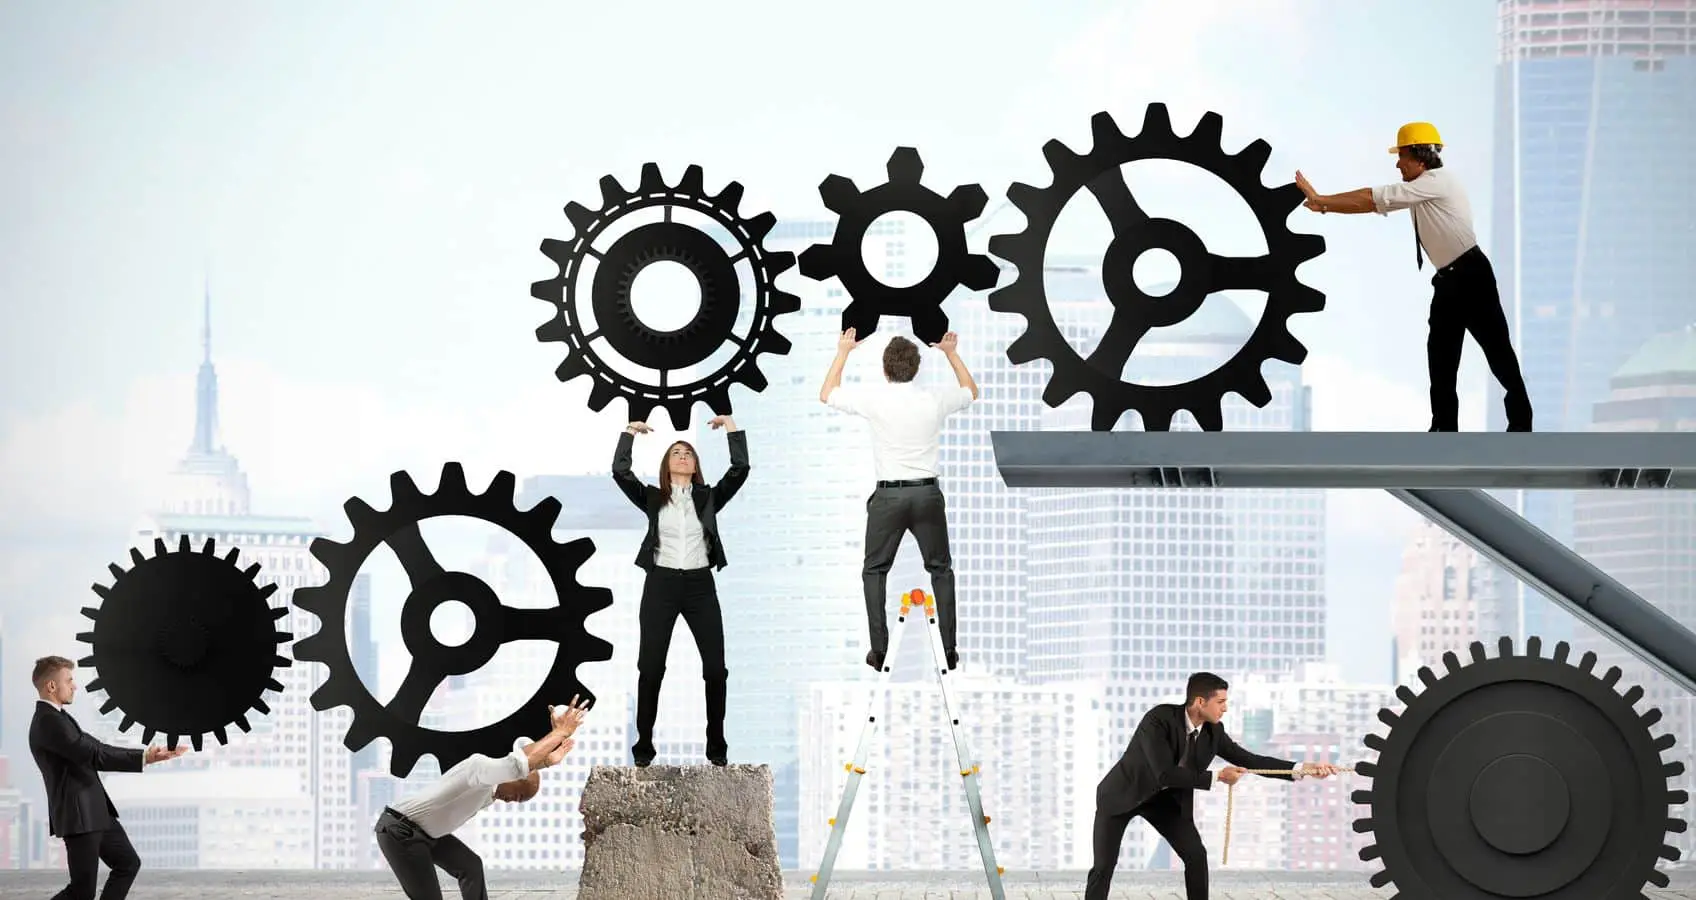

In [3]:
Image ("Images/the-employee-performance-continuum.jpg" , width=1000, height=600)

# Employee Performance Analysis

**Author: Sneha Bhaskar**

**Date**: 10 October 2023 

___________________________________________________

# Overview 

The Employee Performance Analysis delves into a dataset to identify determinants of employee ratings, using a data-centric approach to guide HR strategies. Performance trends were observed across departments like Sales, HR, and Data Science, with Employee Environment Satisfaction, Last Salary Hike, and Work-Life Balance emerging as critical factors. Notably, logistic regression, with its superior predictive accuracy for this data's categorical nature, was deemed more apt than linear regression, emphasizing the importance of model selection based on data characteristics.

# Business & Goal of this project

In today's competitive business landscape, employee performance plays a pivotal role in a company's success. Organizations need to understand the factors influencing employee performance to optimize workforce strategies, foster employee growth, and maintain a competitive edge. For the company in question, having a comprehensive and data-driven understanding of the performance determinants can enable effective HR decisions, from recruitment strategies to tailored training programs.

**Project Goal:**
- The primary objective of this project is to derive actionable insights from the Employee dataset to understand the critical factors affecting employee performance ratings. By leveraging data analytic skills, the company aims to predict performance ratings with high accuracy and pinpoint the most influential features. The insights obtained will serve as a foundation for data-driven decision-making in HR strategies, leading to improved employee performance and, by extension, organizational growth.

The data was taken from https://www.analyticsvidhya.com/blog/2023/05/10-best-data-analytics-projects/#h-employee-performance-analysis


#### Import standard packages

In [4]:
import pandas as pd #data manipulation and analysis. Can create data frames, filter data, group by attributes, etc. 
import numpy as np #numerical python library for array manipulation, math functions etc.
import seaborn as sns #data visualization library based on Matplotlib, with higher-level functions ad nicer default styles. 

import matplotlib.pyplot as plt #2D plotting lib.
plt.style.use("ggplot") #changes the default style of Matplotlib plots to ggplot.

from statsmodels.formula.api import ols #ordinary least square (OLS) is a regression model aiming to minimise the sum of squared differences between observed and predicted values.
import statsmodels.api as sm #statsmodel includes various statistical tests, models and functions. 
from statsmodels.stats.outliers_influence import variance_inflation_factor #a measure to detect multicollinearity in regression moedels.
import scipy.stats as stats #statistical functions from the SciPy lib, which builds on NumPy. This lib also provides a large number of probability distribution, statistical functions and test for statistical analysis. 
from sklearn.linear_model import LinearRegression  #linear model
from sklearn.model_selection import train_test_split #function for splitting datasets into training and testing sets. 
from sklearn.metrics import mean_squared_error #function for computing the mean squarred error, a meausure of the average of the sqaures of the errors.
from sklearn.preprocessing import OneHotEncoder #preprocessing technique to convert categorical variables to a format that can be provided to machine learning algorithms to improve prediction 
from sklearn.model_selection import cross_val_score #function for evaluating a model using cross-validation 
from sklearn.model_selection import KFold #K-Fold cross validator
from itertools import combinations #itertools is used for generating all possible combination of the given list.

Applying the OSEMN framework to an employee performance dataset can help to analyze and understand employee performance, and potentially improve it.



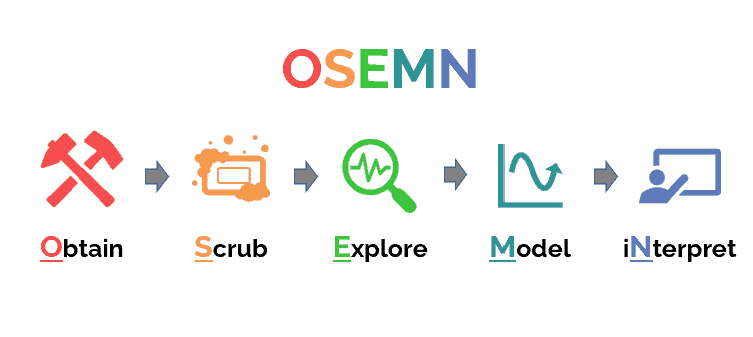

In [5]:
Image ("Images/osemn-2.png" , width=1000, height=600)

# Employee Performance Dataset

### OBTAIN

<font color='red' >This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data we think will be necessary for solving this problem  </font>

In [6]:
df = pd.read_csv ('Data/Employee_Performance_Data.csv')
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [7]:
print("The number of rows is",df.shape[0])
print('The number of columns is',df.shape[1])

The number of rows is 1200
The number of columns is 28


**The given Employee dataset consist of 1200 rows. The features present in the data are 28 columns. The shape of the dataset is 1200x28. The 28 features are classified into quantitative and qualitative where 19 features are quantitative (11 columns consists numeric data & 8 columns consists ordinal data) and 8 features are qualitative. EmpNumber consist alphanumerical data (distinct values) which doesn't play a role as a relevant feature for performance rating.**

### SCRUB 

<font color='red' >This step focuses on cleaning the data, which involves handling missing values, removing outliers, and converting data types and many more. Data cleaning is crucial because the quality of data affects the quality of the final model produced</font>

BASIC CHECKS OF DATA

In [8]:
#check for duplicates
df.duplicated(keep = False).sum()

0

In [9]:
#checking columns
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [10]:
# Extracting the numerical and categorical data
categorical_features = []
numerical_features = []

for column in df.columns:
    if df[column].dtypes == object and len(df[column].unique())<=50:
        categorical_features.append(column)
    else:
        numerical_features.append(column)

In [11]:
categorical_features

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

In [12]:
numerical_features

['EmpNumber',
 'Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

In [13]:
df.shape

(1200, 28)

Dataset contain total 28 features with 1 unique feature (EmpNumber) and 1200 observation.

In [14]:
df.info()
#in this data two type of data is available (integer and object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

STATISTICAL MEASURE OF DATA

In [15]:
#numerical features
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [16]:
#Categorical 
df.describe(include="O")

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [17]:
#check for null values 
df.isna().sum()
#no null values detected

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

### EXPLORE 

<font color='red' > After cleaning the data, I then explore it to understand its structure, trends, and patterns. This typically involves generating descriptive statistics, and visualizing the data using various kinds of plots. The goal is to gain insights that will help you when modeling.  </font>

# Department Wise Performance Rating

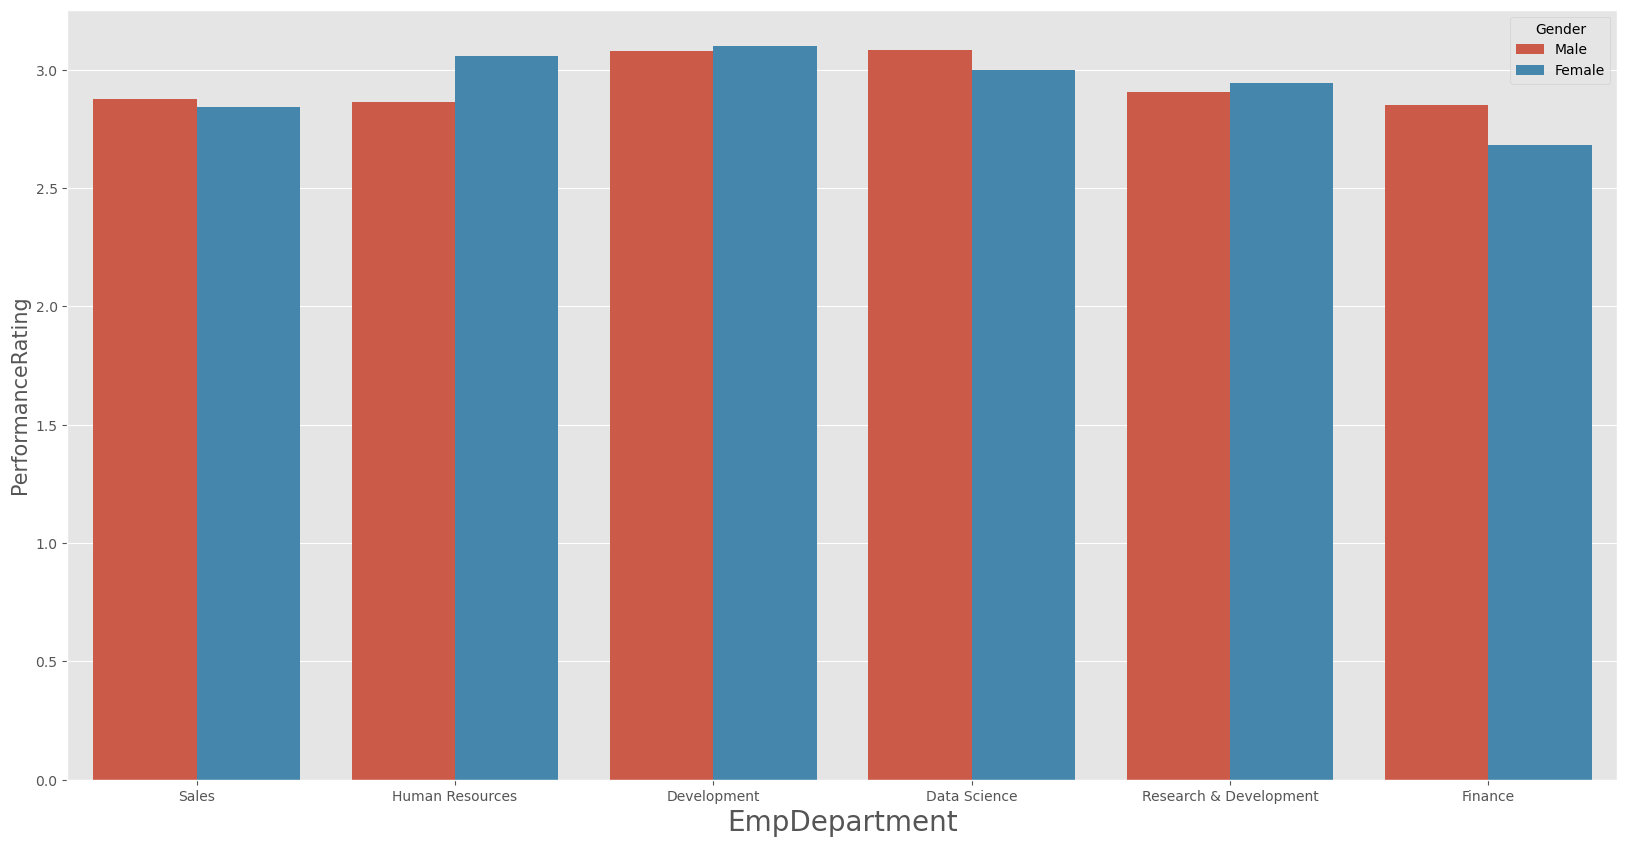

In [18]:
plt.figure(figsize=(20,10), facecolor='white')


sns.barplot(x='EmpDepartment', y='PerformanceRating', hue='Gender', data=df, errorbar= None)

plt.xlabel('EmpDepartment', fontsize=20)
plt.ylabel('PerformanceRating', fontsize=15)
plt.show()

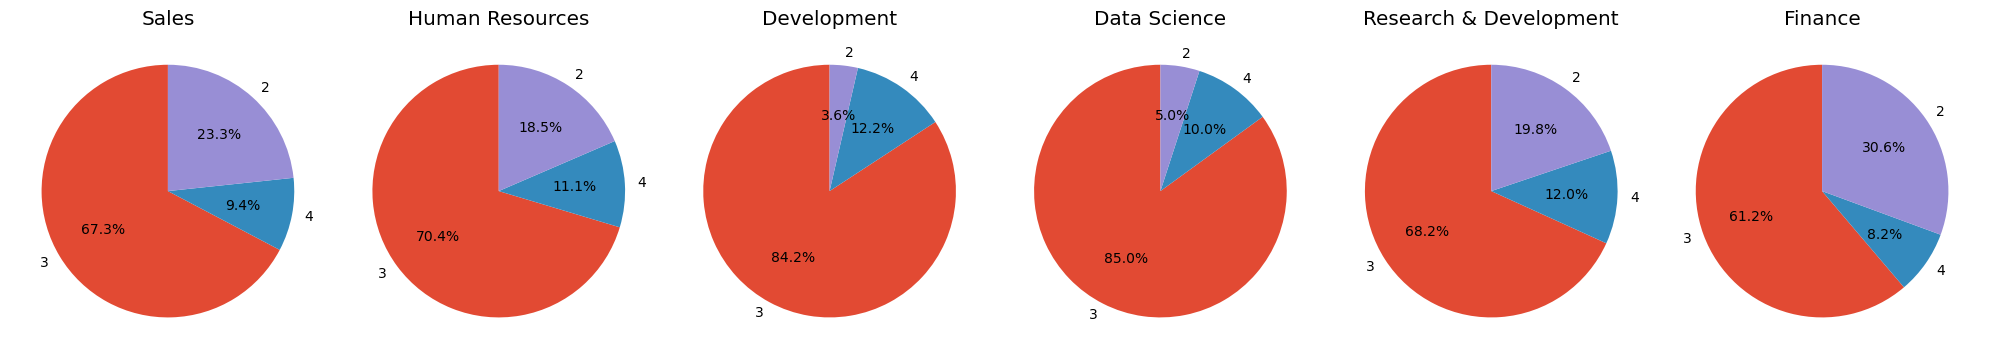

In [19]:
departments = df['EmpDepartment'].unique()
all_ratings = df['PerformanceRating'].unique()

fig, axes = plt.subplots(nrows=1, ncols=len(departments), figsize=(20, 10))

for ax, department in zip(axes, departments):
    filtered_data = df[df['EmpDepartment'] == department]['PerformanceRating']
    value_counts = filtered_data.value_counts().reindex(all_ratings, fill_value=0)
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(department)

plt.tight_layout()
plt.show()

PerformanceRating - Employee's performance rating, ranked 
            
1. Low
2. Good
3. **Excellent** - All the departments have almost 60-80% excellance employee performance rate 
4. Outstanding

### At a Glance: How Departments Are Performing

**Sales:** In the sales world, most employees are hitting the mark with a performance rating of 3. Men have a slight edge in their ratings over women.

**Human Resources:** Most HR professionals are rocking a performance level of 3. A special shoutout to older employees in HR; they might be a tad behind in their ratings. But the women in HR? They're shining stars, consistently delivering top-notch work.

**Development:** The majority of folks in Development are consistent performers, scoring a level 3. Age doesn't seem to matter here - young or old, they're all at the top of their game. As for gender, it's a tie; both men and women are equally impressive.

**Data Science:** Now, this is an exciting department! They boast the highest average of level 3 performers. It's noteworthy to mention that there's a smaller bunch of level 2 performers here compared to other departments. And guess what? Men in Data Science are outperforming a bit!

**Research & Development:** Age is just a number in R&D! Employees of various ages can be found at each performance level. A thumbs-up to the women in this department; they're bringing their A-game.

**Finance:** The finance realm offers an interesting insight: as employees age, their performance seems to take a dip. Men seem to be at the forefront in terms of performance. A notable mention: more experienced folks might be facing challenges, as their performance tends to decrease a bit.

# TOP 3 FACTOR AFFECTING TO THE EMPLOYEE PERFORMANCE

**From the visualisation file, we get the top 3 factors affecting employee performance**

- Employee Environment Satisfaction
- Employee Last Salary Hike Percent
- Employee Work Life Balance

In [20]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


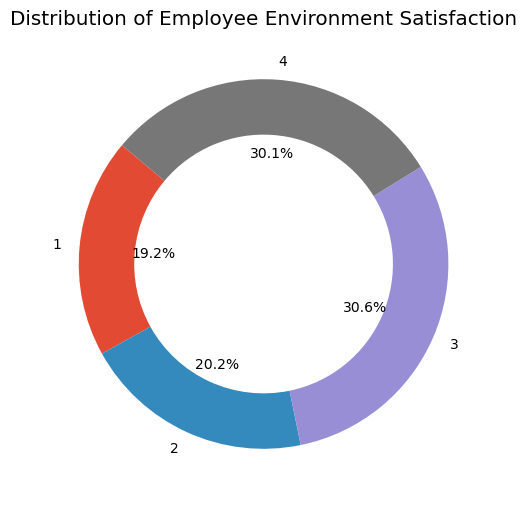

In [21]:
# 1.Employee enviorment Satisfaction
value_counts = df['EmpEnvironmentSatisfaction'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Distribution of Employee Environment Satisfaction')
plt.show()

### Employee Environment Satisfaction

**Maximum Number of Employees Performance Rating belongs to EmpEnvironmentSatisfaction Level 3 & Level 4**

ranking score means;

1. Low: 19%

Description: Employees who rank their satisfaction as "Low" are generally unhappy or discontent with their working environment. This might be due to a number of reasons such as inadequate facilities, poor ergonomics, excessive noise, lack of cleanliness, or other factors that affect their comfort and ability to work productively.

Implications: Low satisfaction often leads to decreased morale, lower productivity, and potentially higher turnover. It's crucial for management to identify the causes and work towards improving the working conditions.
Medium:

2. Medium: 20.2%

Description: A "Medium" rank indicates that employees find their working environment to be average. They might have certain elements they are happy with, but there might be areas of improvement. They neither feel too discontent nor too pleased.

Implications: Employees who rank their satisfaction as medium might not be urgently looking to leave, but they're not fully engaged either. It's a signal for management that there are areas to be improved, but the situation isn't critical.
High:

3. **High - 30.6%**

Description: Employees who give a "High" rank are generally pleased with their working environment. They find most facilities and conditions to be conducive to work, and they feel comfortable in their workspace. It indicates that the organization is taking good measures to ensure employee comfort.

Implications: High satisfaction levels are linked to better morale, increased productivity, and lower turnover. However, it's always beneficial for management to stay proactive and continue seeking feedback to maintain or even enhance this satisfaction level.
Very High:

4. **Very High - 30.1%**

Description: A "Very High" ranking denotes that employees are extremely satisfied with their working environment. This could mean that not only are the basic needs met, but there are additional perks, amenities, or conditions that enhance their work experience. Such environments might include advanced ergonomic setups, appealing aesthetics, state-of-the-art facilities, and a positive, inclusive culture.

Implications: A very high satisfaction level is indicative of a workplace that truly values and understands the importance of a good working environment. Such organizations likely see higher employee loyalty, increased efficiency, and a stronger organizational culture.

In [22]:
# 2.Employee last salary hike percent
pd.crosstab(df['EmpLastSalaryHikePercent'],df['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpLastSalaryHikePercent,,,,
11,28,140,1,169
12,30,123,2,155
13,27,138,3,168
14,28,140,4,172
15,11,67,4,82
16,12,54,2,68
17,9,55,3,67
18,10,63,0,73
19,10,51,2,63


### Employee Last Salary Hike Percentage

**Employees with Salary Hike Percentage of 11-19%** 

Observation: A majority of employees who received a salary hike in the range of 11-19% have been observed to receive performance ratings of 2 (Good) and 3 (Excellent).

Elaboration: If a company is awarding salary hikes in the range of 11-19%, it could indicate that these employees are delivering consistent performance, but perhaps not exceptionally above and beyond what is expected. This is reflected in the 'Good' and 'Excellent' performance ratings.

Employees with a 'Good' rating might have met their targets and expectations, hence the reasonable hike. Those with an 'Excellent' rating might have slightly exceeded the expectations, justifying a higher percentage in the same range.

The data suggests that employees in this salary hike range have shown considerable merit, but not enough to break into the highest echelons of performance (Outstanding).

**Employees with Salary Hike Percentage of 20-25%**

Observation: Employees who received a salary hike in the range of 20-22% predominantly have a performance rating of 4 (Outstanding).

Elaboration: Such a significant salary hike implies that these employees have demonstrated exceptional performance. Their contributions have had a notable positive impact on the organization, warranting a substantial financial reward.

A performance rating of 'Outstanding' indicates that these employees consistently went above and beyond their job roles, showing innovation, leadership, and a significant impact. They might have achieved and even surpassed high-target goals, introduced transformative ideas, or taken on additional responsibilities.

By giving them such a hike, the company is not only rewarding their stellar performance but also possibly trying to retain these top talents by making them feel valued and recognized.

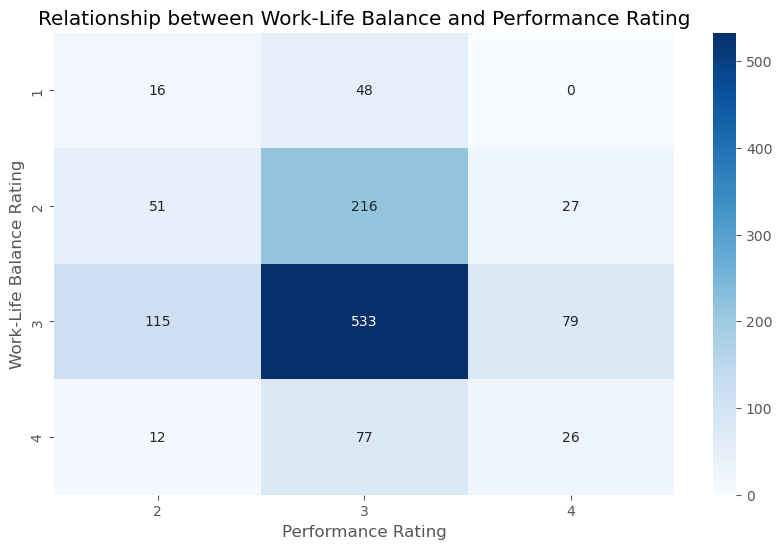

In [23]:
# 3.Employee Work life balance
# Crosstab between EmpWorkLifeBalance and PerformanceRating
ct = pd.crosstab(df['EmpWorkLifeBalance'], df['PerformanceRating'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, cmap='Blues', fmt='g')

# Titles and labels
plt.title('Relationship between Work-Life Balance and Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Work-Life Balance Rating')
plt.show()

**EmpWorkLifeBalance** - Assessment of work-life balance 

ranking;  
1. Bad
2. Good
3. Better
4. Best

Interpretation

This heatmap shows that employees with a 'Better' work-life balance rating (level 3) tend to have excellant performance ratings, this suggests several insights:

Importance of Balance: Employees who perceive their work-life balance as 'Better' tend to perform better. This underscores the importance of fostering a work environment where employees can achieve a satisfactory balance between work and personal life.

Motivation and Productivity: A 'Better' work-life balance might indicate that employees are less stressed, more motivated, and more satisfied with their jobs, leading to higher performance levels.

Comparison with Other Levels: The strength of this relationship becomes even more pronounced if the 'Better' rating's darker squares starkly contrast with those of other ratings. For instance, if employees with a 'Good' or 'Best' work-life balance don't show as strong a pattern with performance, it might indicate that there's something unique about the conditions or perceptions of the 'Better' group.

# Univariate analysis of categorical features - Target variable (Gender)

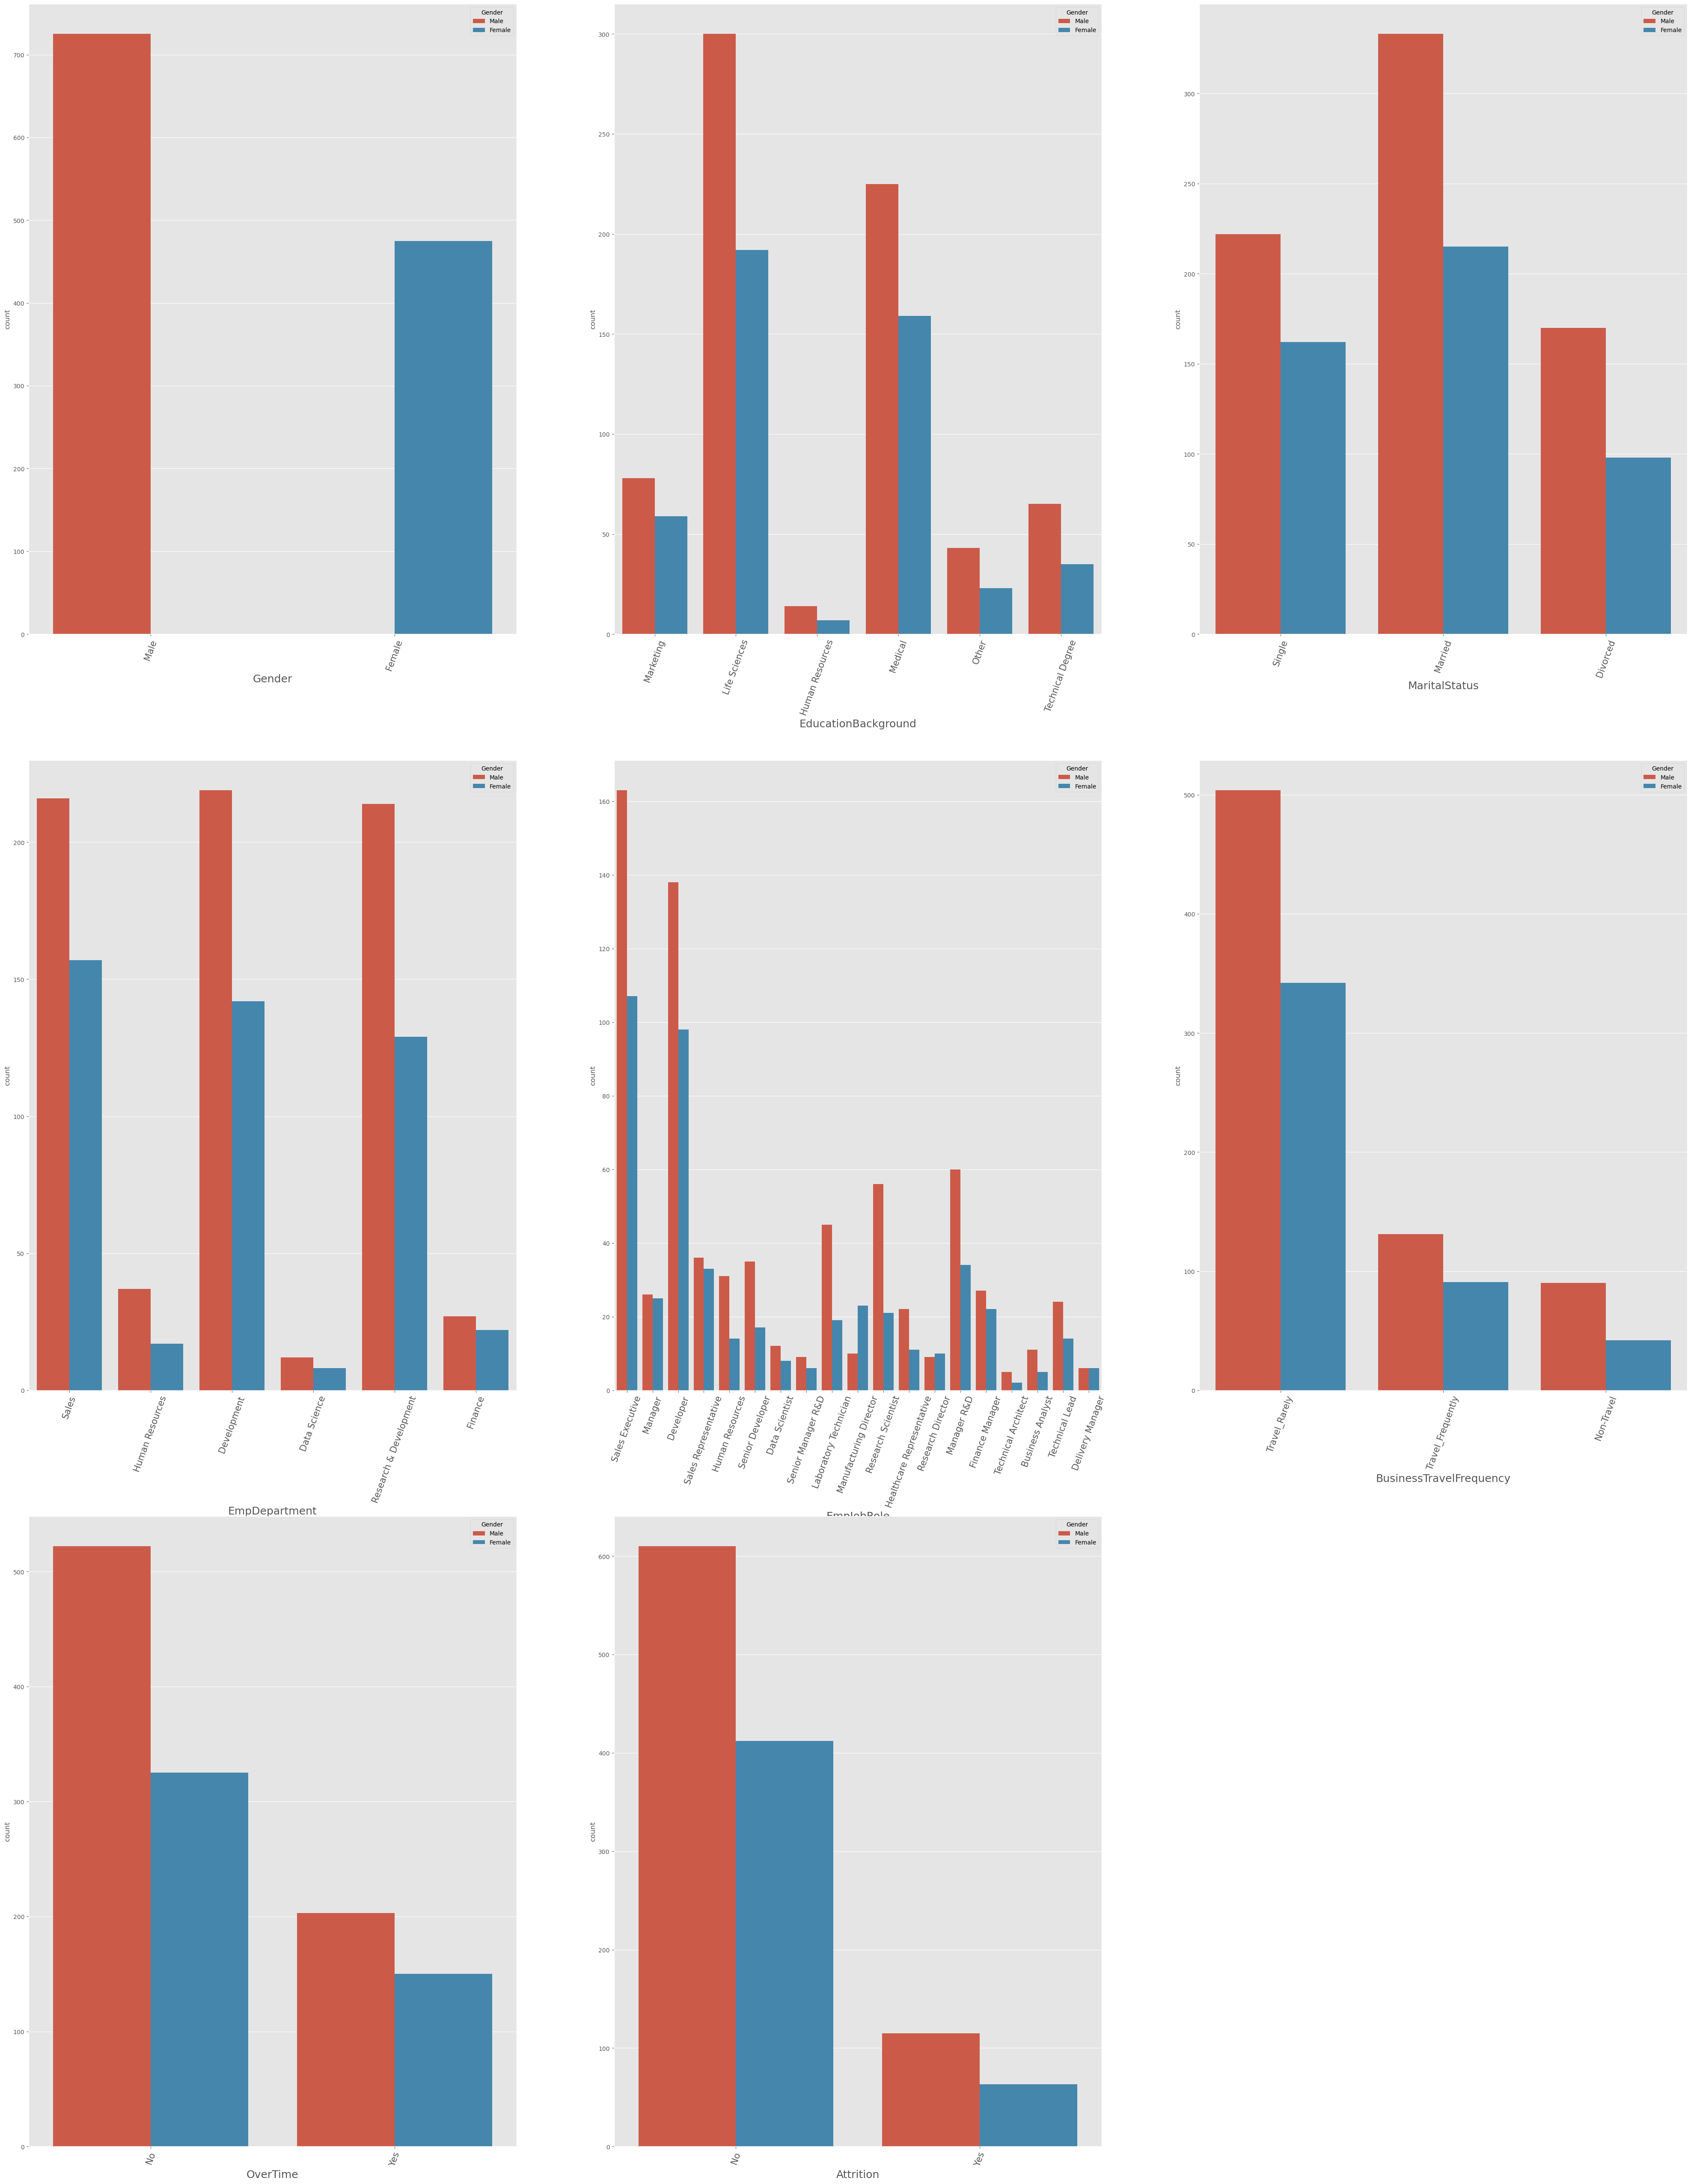

In [24]:
plt.figure(figsize=(50,65))
count_plot = 1
for feature in categorical_features:
    if count_plot <=12:
        ax = plt.subplot(3,3,count_plot)
        sns.countplot(x=df[feature],hue=df['Gender'])
        plt.xlabel(feature,fontsize=18,)
        plt.xticks(rotation = 70,fontsize=15)
    count_plot +=1

From Above diagrams it can be observed from the given dataset: Gender: In genders, Male empolyees are higher in number.

EducationBackground: In LifeScience and Medical, Male and Female are higer in number. However, in that, Male employees are more.In HumanResource, very few Male and Female are working as employee.

MaritalStatus: In this, married are working more as compared to other.

EmpDepartment: In Development department, both Male and Female are working which are higher in quantity of all employees whereas DataScience has very low in number.

BusinessTravelFequency: Male and Female who travels rarely are drastically higer in number.

OverTime: Male and Female who do not prefer working overtime are more than who prefer overtime.

Attrition: The Male and Female who do not want to woker longer in the same company are very less in number among all employees.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Manager'),
  Text(2, 0, 'Developer'),
  Text(3, 0, 'Sales Representative'),
  Text(4, 0, 'Human Resources'),
  Text(5, 0, 'Senior Developer'),
  Text(6, 0, 'Data Scientist'),
  Text(7, 0, 'Senior Manager R&D'),
  Text(8, 0, 'Laboratory Technician'),
  Text(9, 0, 'Manufacturing Director'),
  Text(10, 0, 'Research Scientist'),
  Text(11, 0, 'Healthcare Representative'),
  Text(12, 0, 'Research Director'),
  Text(13, 0, 'Manager R&D'),
  Text(14, 0, 'Finance Manager'),
  Text(15, 0, 'Technical Architect'),
  Text(16, 0, 'Business Analyst'),
  Text(17, 0, 'Technical Lead'),
  Text(18, 0, 'Delivery Manager')])

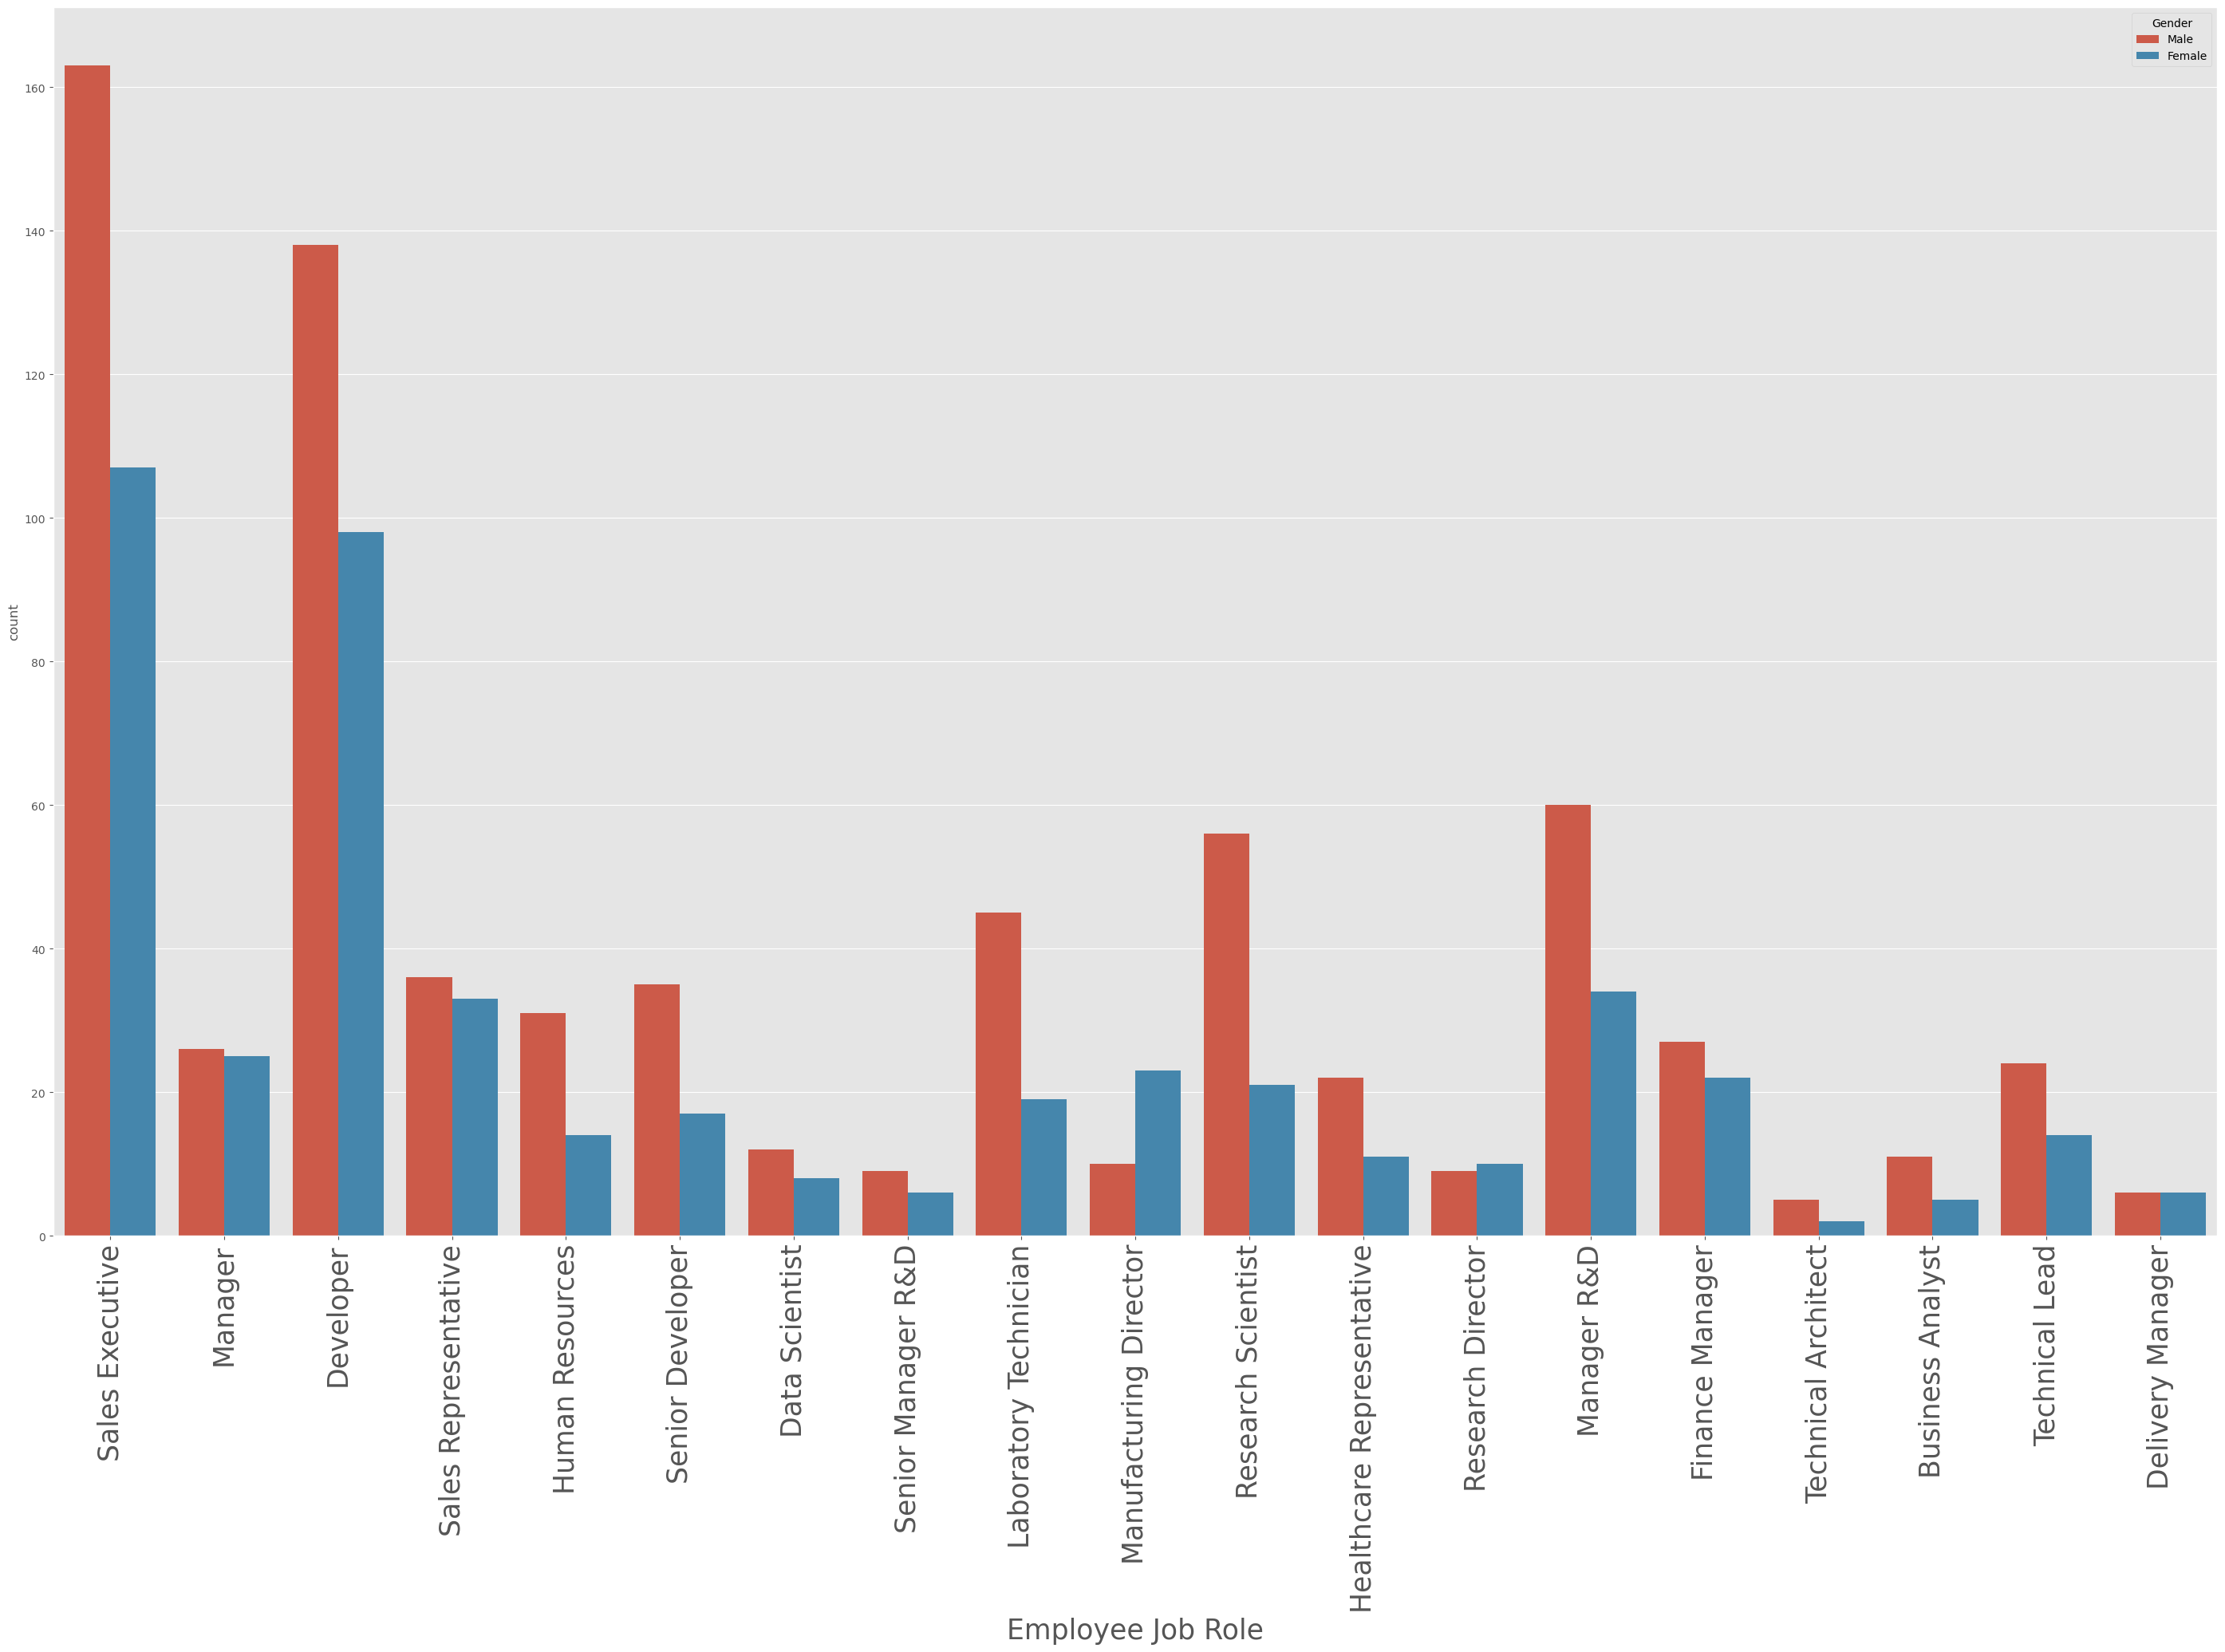

In [25]:
# In above plot EmpJobRole does not show clear label text so creating single plot for it.
plt.figure(figsize=(35,20))
sns.countplot(x=df['EmpJobRole'],hue=df['Gender'])
plt.xlabel("Employee Job Role",fontsize=25)
plt.xticks(rotation=90,fontsize=25)

From above diagram EmpJobRole, both Male and Female employee who work as Sales Executive and Developer are huge in number. Likewise, as TechnicalArchitect very little people are working in terms of Male and Female.

# Univariate analysis of numerical features

In [26]:
# Dropping employee number because this is a constant column as well as drop Years Since Last Promotion because we create a new feaure using square root tr
df.drop(['EmpNumber'],axis=1,inplace=True)

In [27]:
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,...,2,6,3,3,6,5,0,4,No,4
1196,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,...,1,4,2,3,1,0,0,0,No,3
1197,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,...,3,20,3,3,20,8,3,8,No,3
1198,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,...,2,9,3,4,8,7,7,7,No,3


In [28]:
#Removing EmpNumber 
numerical_features.remove('EmpNumber')

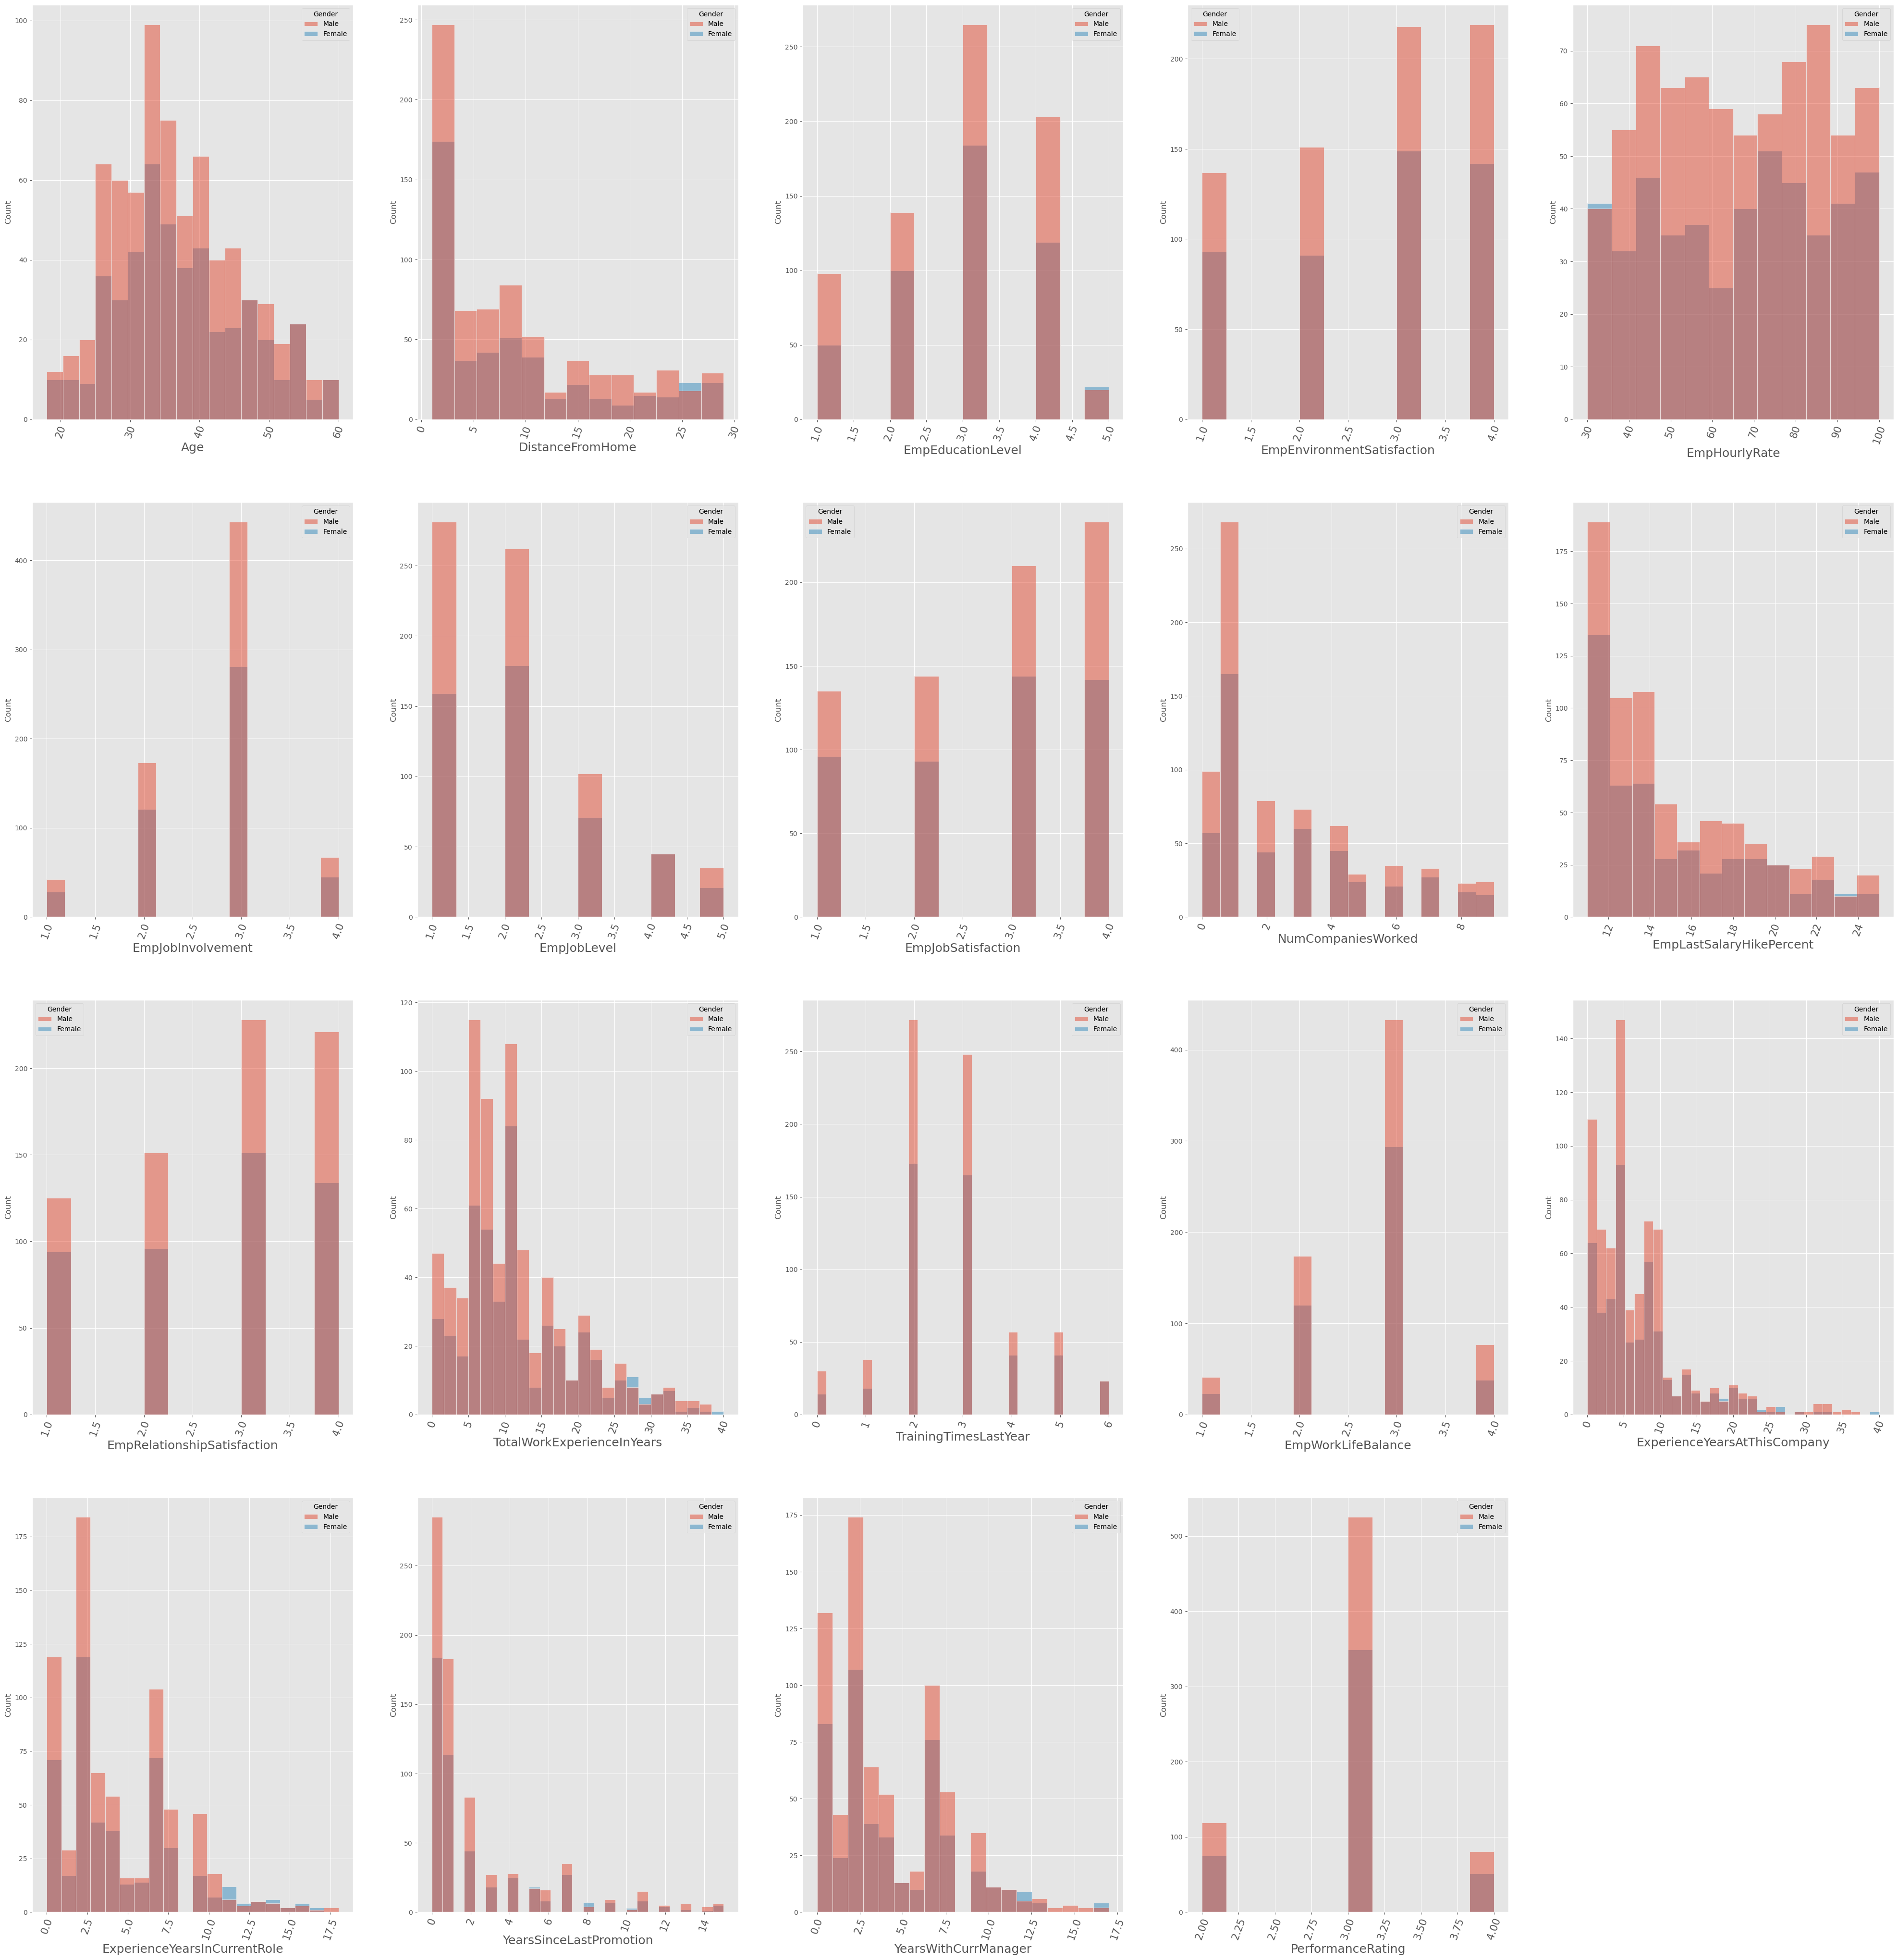

In [29]:
plt.figure(figsize=(50,65))
count_plot = 1

for feature in numerical_features:
    if count_plot <=25:
        ax = plt.subplot(5,5,count_plot)
        sns.histplot(x = df[feature].dropna(axis=0),hue=df['Gender'])
        plt.xlabel(feature,fontsize=18,)
        plt.xticks(rotation = 70,fontsize=15)
    count_plot +=1

# CHECKING THE DISTRIBUTION OF CONTINUOUS FEATURE

Those feature continuous in nature only use this feature to plot a distribution

In [30]:
# Get the continuous features
df.select_dtypes('int64').head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3


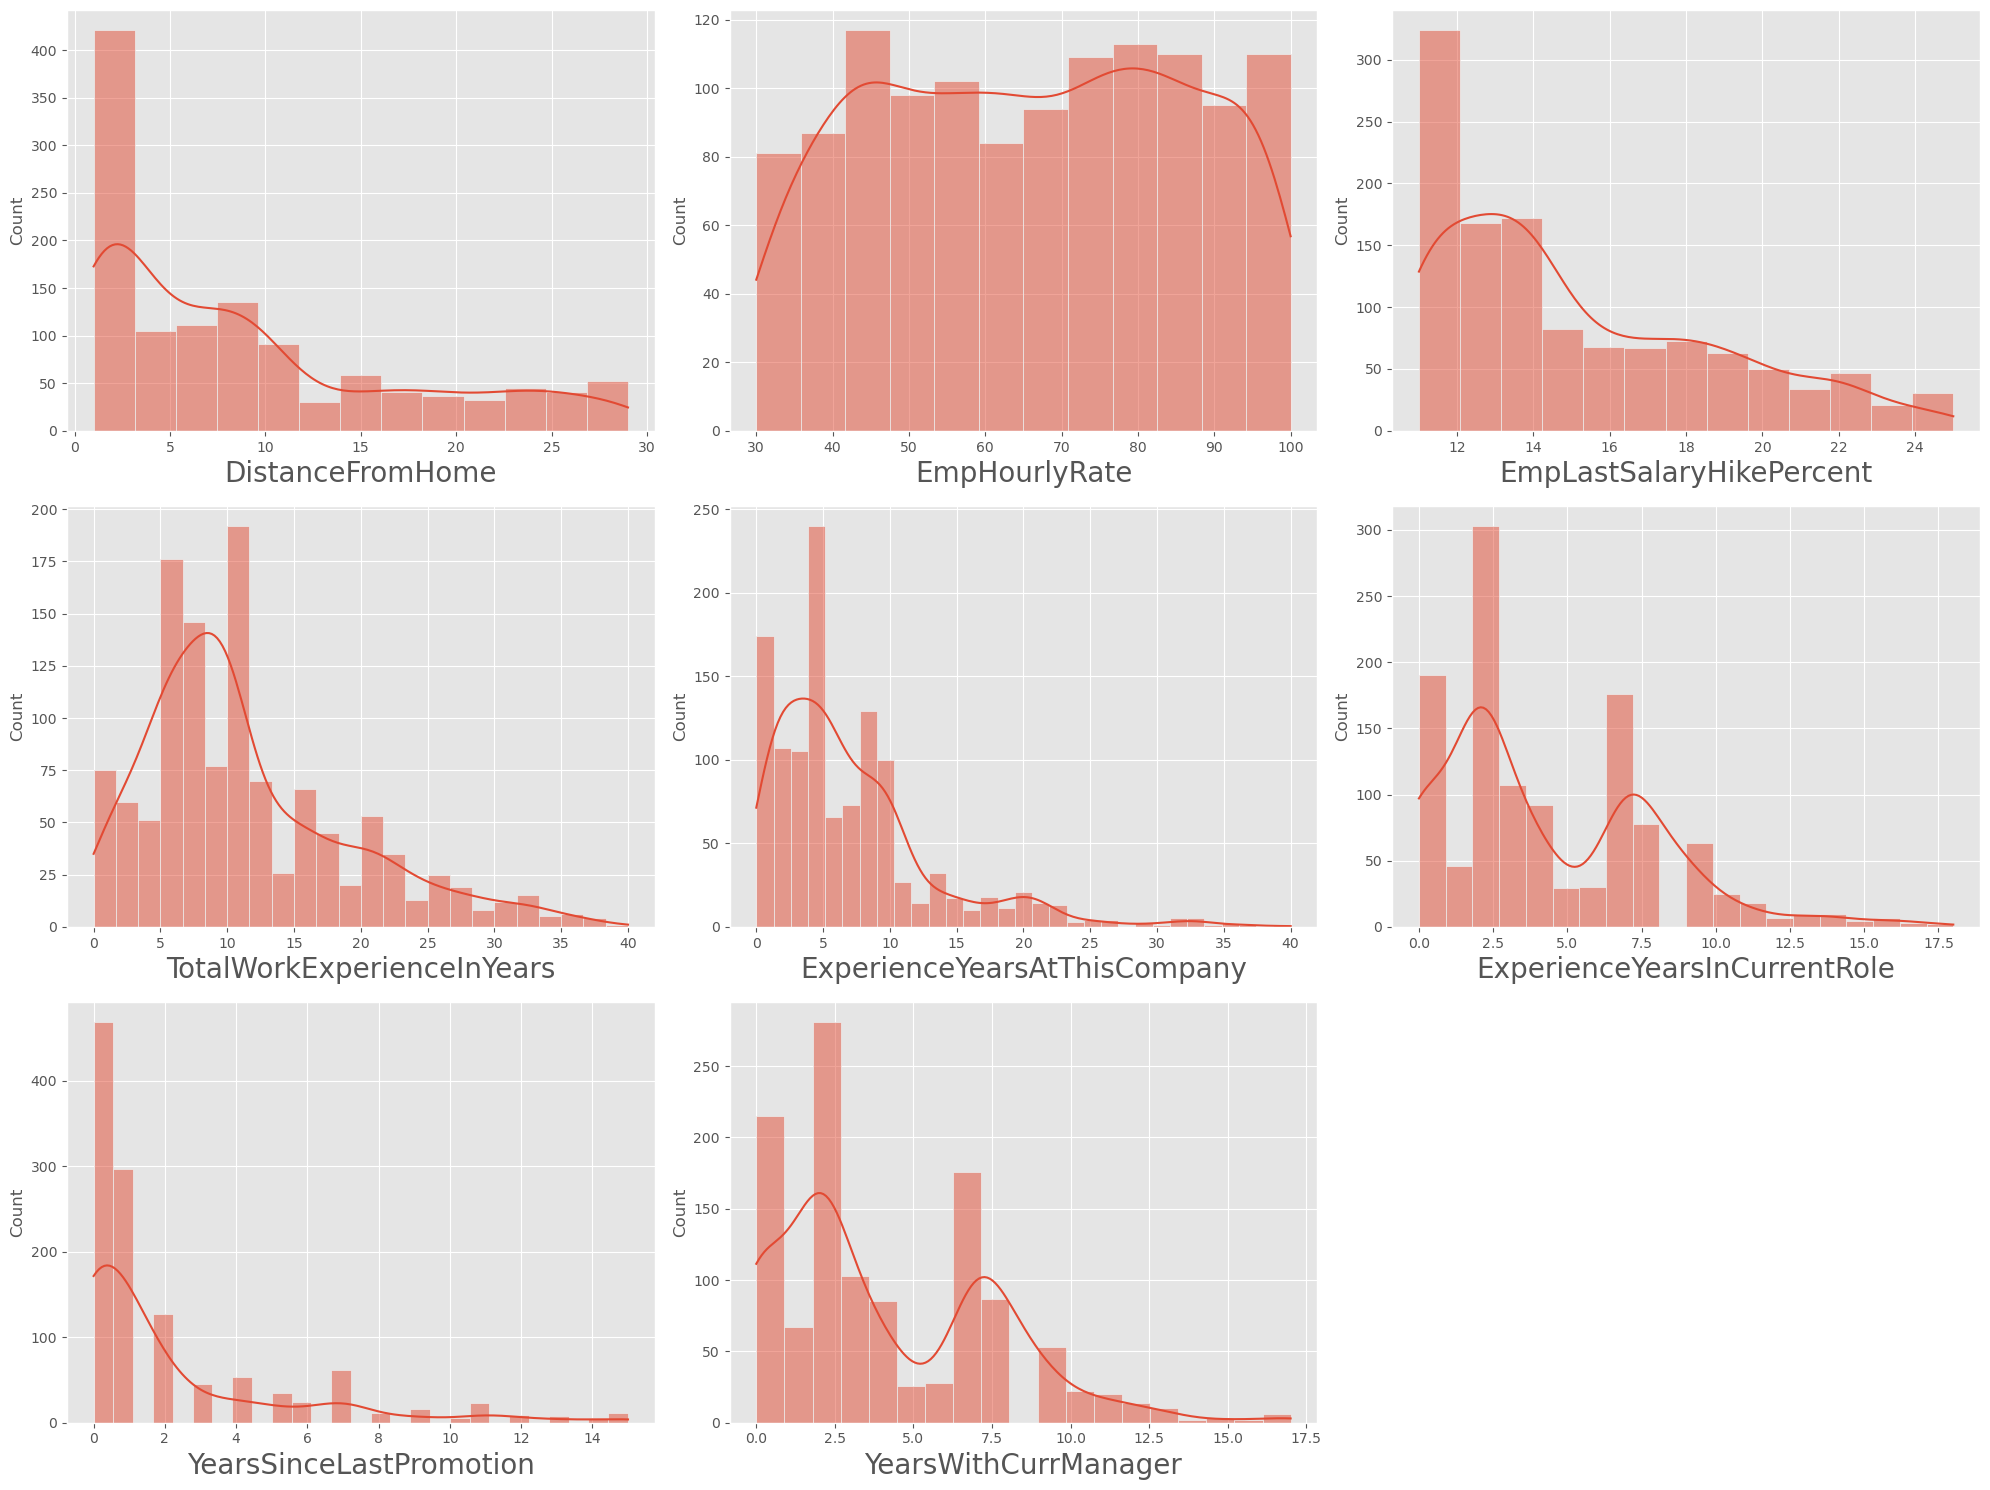

In [31]:
continuous = df[['DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
                   'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,15)) # defining canvas size
plotno = 1 # counter

for column in continuous: # iteration of columns / accessing the columns from continuous 
    if plotno<=8:    # set the limit
        plt.subplot(3,3,plotno) # plotting 8 graphs (3-rows,3-columns), plotnumber is for count
        sns.histplot(x=continuous[column], kde=True) # Using histplot with Kernel Density Estimation
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show()

### CHECK THE SKEWNESS
Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

In [32]:
print('1.Distance From Home Feature Skewness:',df.DistanceFromHome.skew())
print('2.Employee Hourly Rate Feature Skewness:',df.EmpHourlyRate.skew())
print('3.Employee Last Salary Hike Percent Feature Skewness:',df.EmpLastSalaryHikePercent.skew())
print('4.Total Work Experiance In Year Feature Skewness:',df.TotalWorkExperienceInYears.skew())
print('5.Experiance Year At This Company Feature Skewness:',df.ExperienceYearsAtThisCompany.skew())
print('6.Experiance Year In Current Role Feature Skewness:',df.ExperienceYearsInCurrentRole.skew())
print('7.Year Since Last Promotion Feature Skewness:',df.YearsSinceLastPromotion.skew())
print('8.Years With Current Manager Feature Skewness:',df.YearsWithCurrManager.skew())

1.Distance From Home Feature Skewness: 0.9629561160828001
2.Employee Hourly Rate Feature Skewness: -0.035164888157941436
3.Employee Last Salary Hike Percent Feature Skewness: 0.8086536332261228
4.Total Work Experiance In Year Feature Skewness: 1.0868618597364565
5.Experiance Year At This Company Feature Skewness: 1.789054979919473
6.Experiance Year In Current Role Feature Skewness: 0.8881586703270758
7.Year Since Last Promotion Feature Skewness: 1.9749315589155791
8.Years With Current Manager Feature Skewness: 0.8131582957766446


- From above all Feature skewness only one feature Year Since Last Promotion have skew so we need to do feature transformation in data preprocessing

### CHECK THE KURTOSIS
kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable.

In [33]:
print('1.Distance From Home Feature kurtosis:',df.DistanceFromHome.kurtosis())
print('2.Employee Hourly Rate Feature kurtosis:',df.EmpHourlyRate.kurtosis())
print('3.Employee Last Salary Hike Percent Feature kurtosis:',df.EmpLastSalaryHikePercent.kurtosis())
print('4.Total Work Experiance In Year Feature kurtosis:',df.TotalWorkExperienceInYears.kurtosis())
print('5.Experiance Year At This Company Feature kurtosis:',df.ExperienceYearsAtThisCompany.kurtosis())
print('6.Experiance Year In Current Role Feature kurtosis:',df.ExperienceYearsInCurrentRole.kurtosis())
print('7.Year Since Last Promotion Feature kurtosis:',df.YearsSinceLastPromotion.kurtosis())
print('8.Years With Current Manager Feature kurtosis:',df.YearsWithCurrManager.kurtosis())

1.Distance From Home Feature kurtosis: -0.24201677636189256
2.Employee Hourly Rate Feature kurtosis: -1.1868905128360532
3.Employee Last Salary Hike Percent Feature kurtosis: -0.29974077544117517
4.Total Work Experiance In Year Feature kurtosis: 0.8056333333819827
5.Experiance Year At This Company Feature kurtosis: 4.057959404441291
6.Experiance Year In Current Role Feature kurtosis: 0.4380286874251209
7.Year Since Last Promotion Feature kurtosis: 3.5390800793468817
8.Years With Current Manager Feature kurtosis: 0.14820164456972984


From above all Feature kurtosis only high in two features " experiance year at this company & Year Since Last Promotion"have kutosis so we need to do feature transformation in data preprocessing

### FEATURE TRANSFORMATION

**Q-Q Plot:** Q–Q plot is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other.



In [34]:
import pylab
import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

# define a function to plot a Q-Q plot
def plot_df(df,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

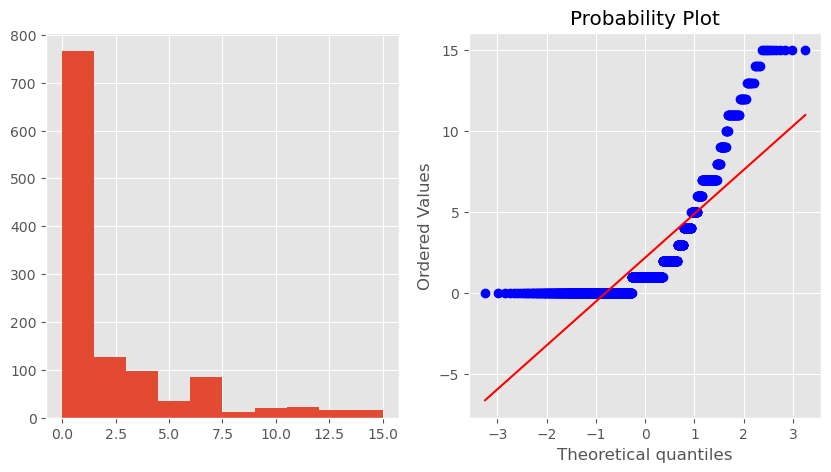

In [35]:
plot_df(df,'YearsSinceLastPromotion')

In [36]:
df['square_YearsSinceLastPromotion'] = df.YearsSinceLastPromotion**(1/2)

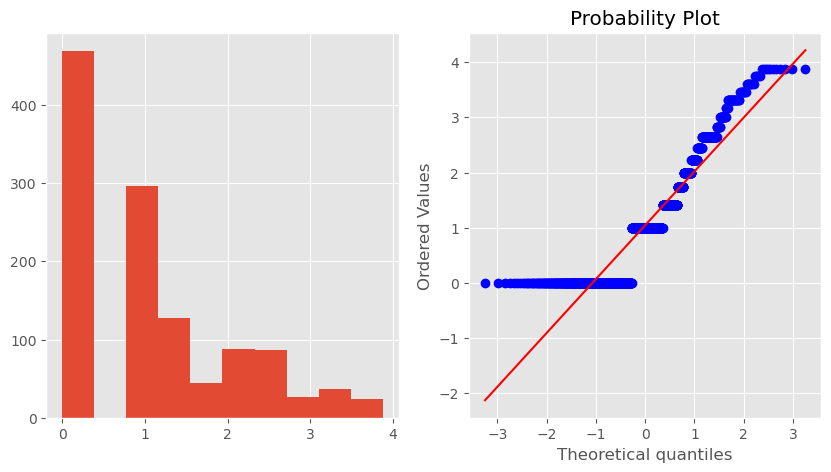

In [37]:
plot_df(df,'square_YearsSinceLastPromotion')

Now some points are close to the line.


# CONVERT CATEGORICAL TO NUMERICAL

In [38]:
# Get all categorical feature list
list(df.select_dtypes('object'))

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

**GENDER**

In [39]:
#Gender
# Get value counts of gender
df.Gender.value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [40]:
# Use mannual encoding to map the labels
df.Gender = df.Gender.map({'Male':1,'Female':0})

#Mannual Encoding: Mannual encoding is a best techinque to handel categorical feature with the help of map function, map the labels based on frequency.

**EDUCATION BACKGROUND**

In [41]:
#Eduation Background 
# Get value counts of Education Background
df.EducationBackground.value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

In [42]:
# Use frequency encoding, is an encoding technique to transform an original categorical variable to a numerical variable by considering the frequency distribution of the data getting value counts
df.loc[df['EducationBackground']=='Life Sciences','EducationBackground']=5
df.loc[df['EducationBackground']=='Medical','EducationBackground']=4
df.loc[df['EducationBackground']=='Marketing','EducationBackground']=3
df.loc[df['EducationBackground']=='Technical Degree','EducationBackground']=2
df.loc[df['EducationBackground']=='Other','EducationBackground']=1
df.loc[df['EducationBackground']=='Human Resources','EducationBackground']=0

In [43]:
# Checking conversion happen or not
df.EducationBackground.value_counts()

5    492
4    384
3    137
2    100
1     66
0     21
Name: EducationBackground, dtype: int64

**MARITAL STATUS**

In [44]:
# Get the value counts of marital status
df.MaritalStatus.value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

In [45]:
# Use mannual encoding
df.MaritalStatus = df.MaritalStatus.map({'Married':2,'Single':1,'Divorced':0})

In [46]:
# Check conversion happen or not
df.MaritalStatus.value_counts()

2    548
1    384
0    268
Name: MaritalStatus, dtype: int64

**EMPLOYEE DEPARTMENT** 


In [47]:
# Get the value counts of employee department 
df.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [48]:
# Use Frequency encoding
df.loc[df['EmpDepartment']=='Sales','EmpDepartment']=5
df.loc[df['EmpDepartment']=='Development','EmpDepartment']=4
df.loc[df['EmpDepartment']=='Research & Development','EmpDepartment']=3
df.loc[df['EmpDepartment']=='Human Resources','EmpDepartment']=2
df.loc[df['EmpDepartment']=='Finance','EmpDepartment']=1
df.loc[df['EmpDepartment']=='Data Science','EmpDepartment']=0

In [49]:
# Check conversion happen or not
df.EmpDepartment.value_counts()

5    373
4    361
3    343
2     54
1     49
0     20
Name: EmpDepartment, dtype: int64

**EMPLOYEE JOB ROLE**

In [50]:
# Getting the value counts of EmpJobRole
df.EmpJobRole.value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64

In [51]:
# Use frequency encoding because feature contain a lots of label
df.loc[df['EmpJobRole']=='Sales Executive','EmpJobRole']=18
df.loc[df['EmpJobRole']=='Developer','EmpJobRole']=17
df.loc[df['EmpJobRole']=='Manager R&D','EmpJobRole']=16
df.loc[df['EmpJobRole']=='Research Scientist','EmpJobRole']=15
df.loc[df['EmpJobRole']=='Sales Representative','EmpJobRole']=14
df.loc[df['EmpJobRole']=='Laboratory Technician','EmpJobRole']=13
df.loc[df['EmpJobRole']=='Senior Developer','EmpJobRole']=12
df.loc[df['EmpJobRole']=='Manager','EmpJobRole']=11
df.loc[df['EmpJobRole']=='Finance Manager','EmpJobRole']=10
df.loc[df['EmpJobRole']=='Human Resources','EmpJobRole']=9
df.loc[df['EmpJobRole']=='Technical Lead','EmpJobRole']=8
df.loc[df['EmpJobRole']=='Manufacturing Director','EmpJobRole']=7
df.loc[df['EmpJobRole']=='Healthcare Representative','EmpJobRole']=6
df.loc[df['EmpJobRole']=='Data Scientist','EmpJobRole']=5
df.loc[df['EmpJobRole']=='Research Director','EmpJobRole']=4
df.loc[df['EmpJobRole']=='Business Analyst','EmpJobRole']=3
df.loc[df['EmpJobRole']=='Senior Manager R&D','EmpJobRole']=2
df.loc[df['EmpJobRole']=='Delivery Manager','EmpJobRole']=1
df.loc[df['EmpJobRole']=='Technical Architect','EmpJobRole']=0

In [52]:
# Check conversion happen or not
df.EmpJobRole.value_counts()

18    270
17    236
16     94
15     77
14     69
13     64
12     52
11     51
10     49
9      45
8      38
7      33
6      33
5      20
4      19
3      16
2      15
1      12
0       7
Name: EmpJobRole, dtype: int64

**BUSINESS TRAVEL FREQUENCY**

In [53]:
# Get the value count of buisness travel frequency
df.BusinessTravelFrequency.value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

In [54]:
# Use mannual encoding Because feature contain minimum label
df.BusinessTravelFrequency = df.BusinessTravelFrequency.map({'Travel_Rarely':2,'Travel_Frequently':1,'Non-Travel':0})

In [55]:
# Check conversion happen or not
df.BusinessTravelFrequency.value_counts()

2    846
1    222
0    132
Name: BusinessTravelFrequency, dtype: int64

**OVERTIME**

In [56]:
# Get the value count of Overtime
df.OverTime.value_counts()

No     847
Yes    353
Name: OverTime, dtype: int64

In [57]:
# Use mannual Encoding
df.OverTime = df.OverTime.map({'No':1,'Yes':0})

In [58]:
# Check conversion happen or not
df.OverTime.value_counts()

1    847
0    353
Name: OverTime, dtype: int64

**ATTRITION**

In [59]:
# Get the value counts of Attrition
df.Attrition.value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

In [60]:
# Use Mannual encoding because feature contain less no of label
df.Attrition = df.Attrition.map({'No':1,'Yes':0})

In [61]:
# Check conversion happen or not
df.Attrition.value_counts()

1    1022
0     178
Name: Attrition, dtype: int64

In [62]:
# Check all data features 
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion
0,32,1,3,1,5,18,2,10,3,4,...,10,2,2,10,7,0,8,1,3,0.000000
1,47,1,3,1,5,18,2,14,4,4,...,20,2,3,7,7,1,7,1,3,1.000000
2,40,1,5,2,5,18,1,5,4,4,...,20,2,3,18,13,1,12,1,4,1.000000
3,41,1,0,0,2,11,2,10,4,2,...,23,2,2,21,6,12,6,1,3,3.464102
4,60,1,3,1,5,18,2,16,4,1,...,10,1,3,2,2,2,2,1,3,1.414214


# CHECK OUTLIERS AND IMPUTE OUTLIERS

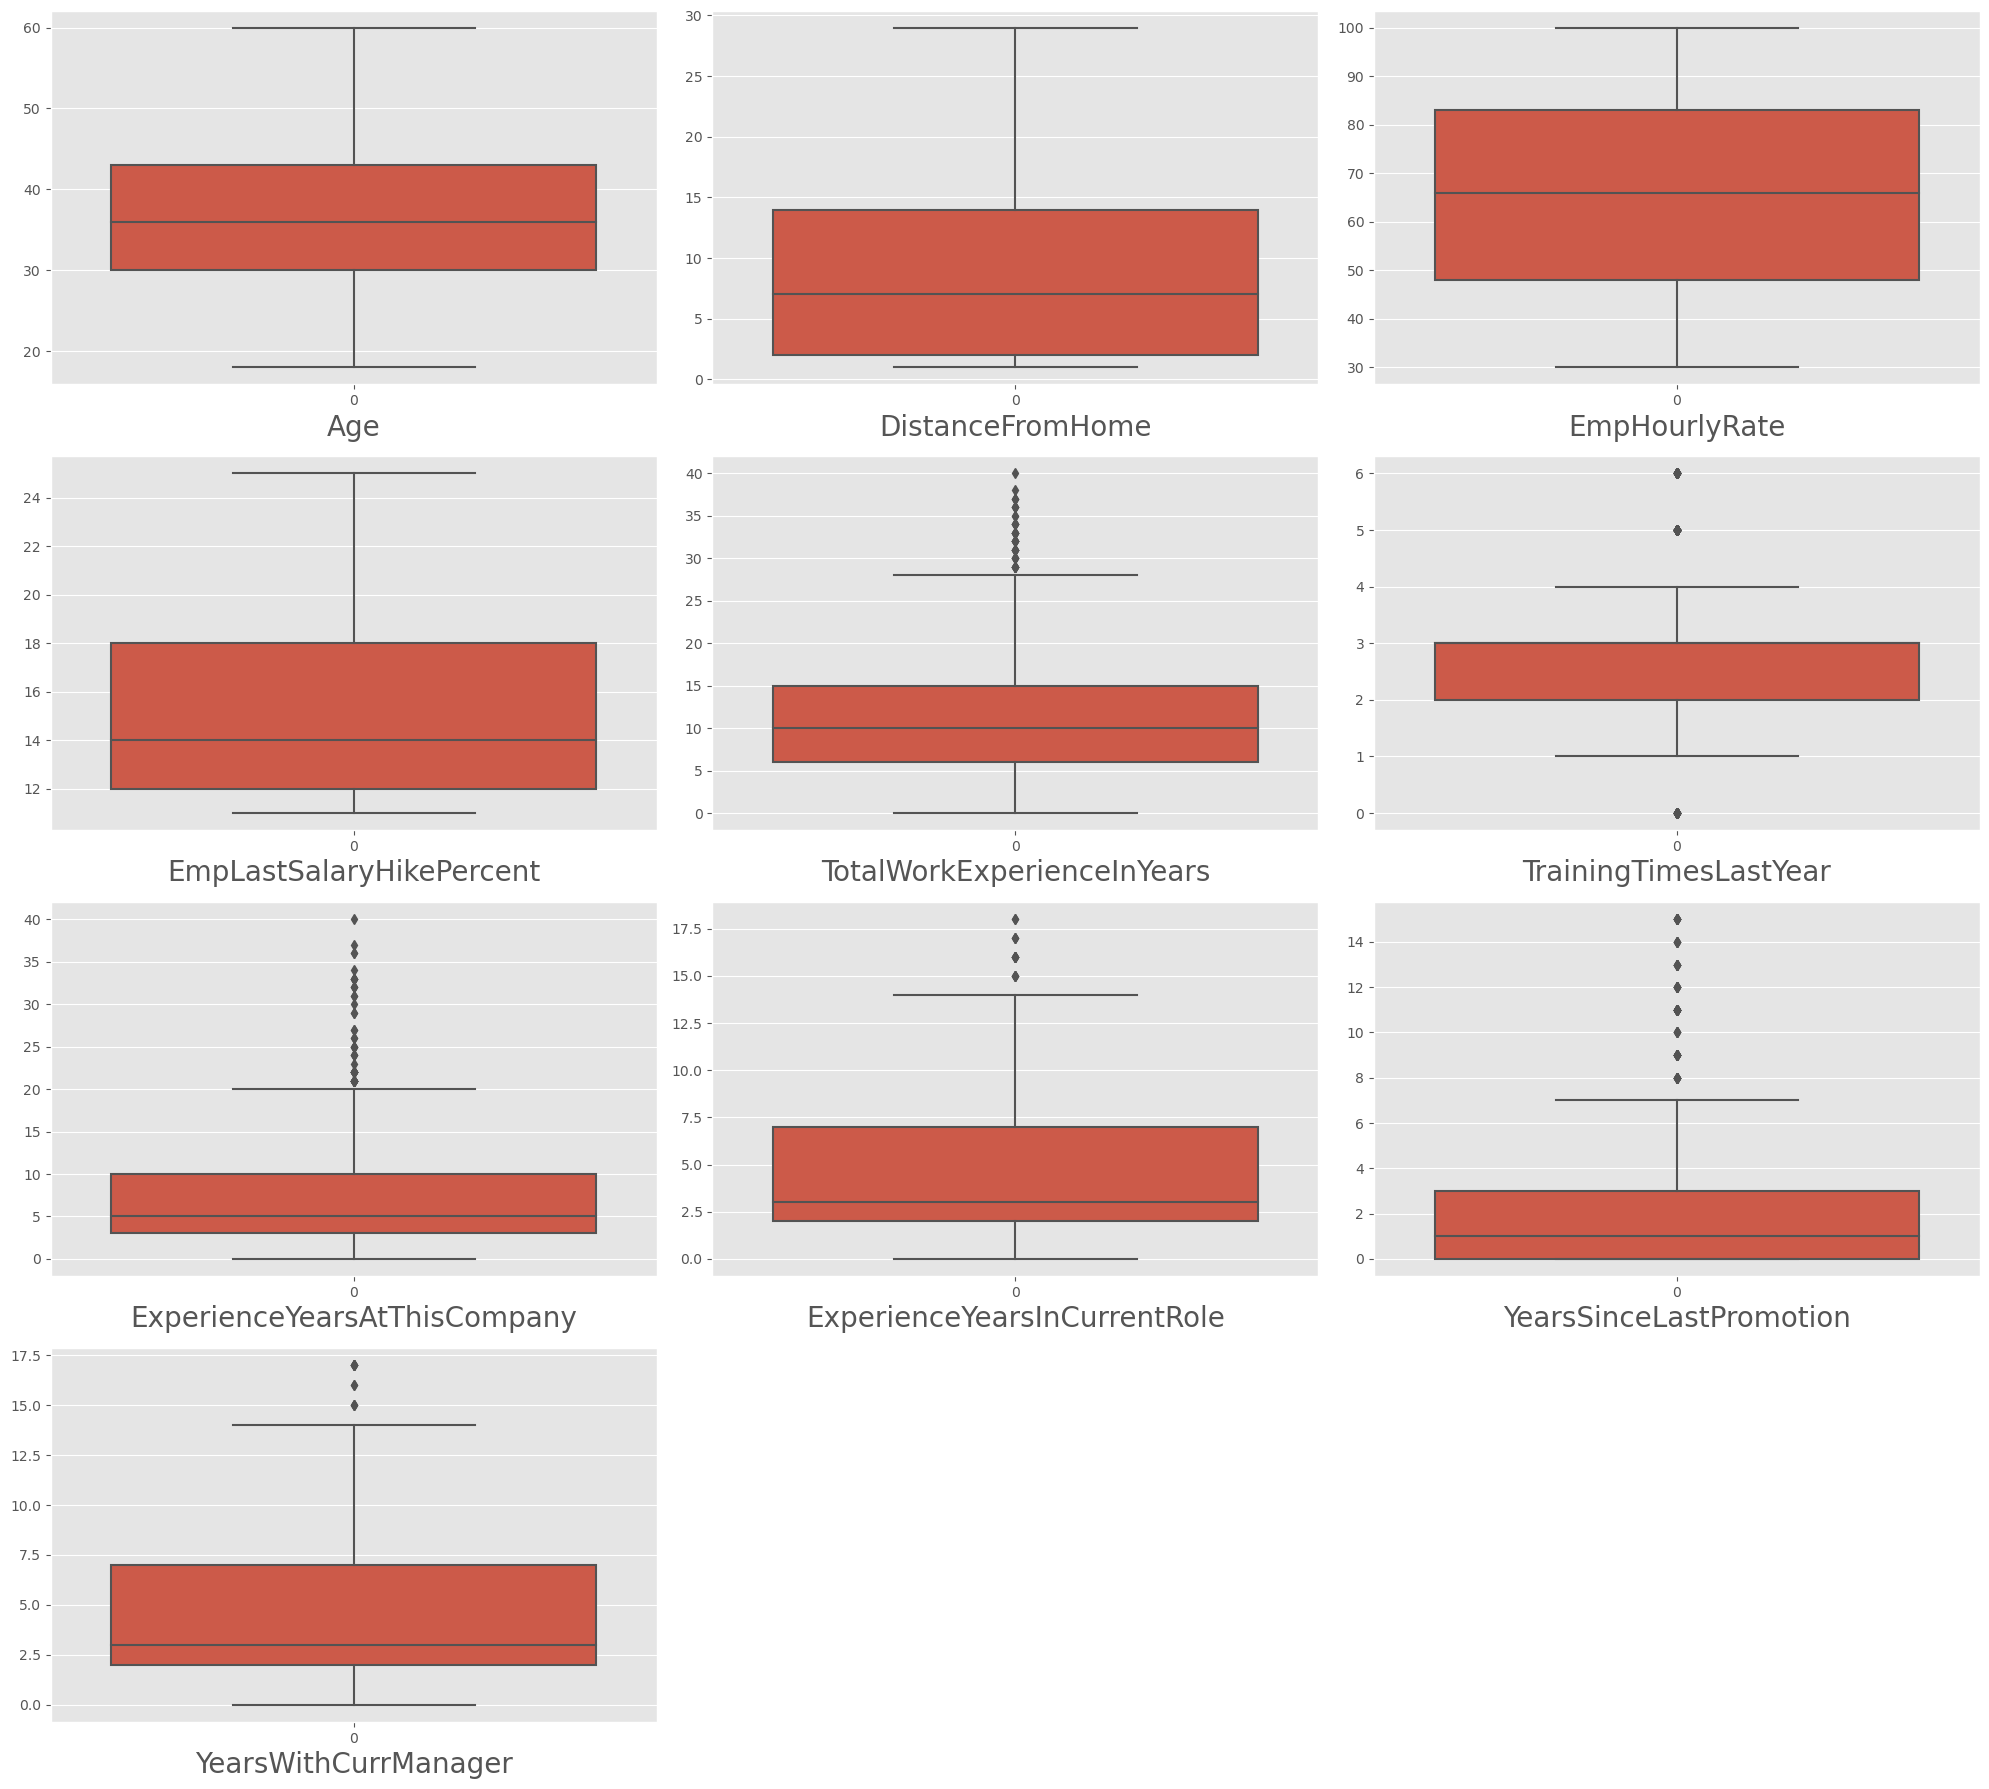

In [63]:
out = df[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
                   'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count 
    if plotno<=12:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

Here we are use inter quatile range to impute the outlier, becuase data is not normally distributed.

**IQR = Inter Quatile Range**

IQR stand for the interquatile range, When a data set has outliers or extreme values, we summarize a typical value using the median as opposed to the mean. which is the difference between the first and third quartiles

### Addressing the outliers 

In [64]:
#Total Work Experiance in year
# Use iqr range because some skewed in data
iqr = stats.iqr(df['TotalWorkExperienceInYears'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = df['TotalWorkExperienceInYears'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 9.0
Minimum limit: -7.5
Maximum Limit: 28.5


In [65]:
# Impute outlier
df.loc[df['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=df['TotalWorkExperienceInYears'].median()

In [66]:
# filtering data after imputation
df.loc[df['TotalWorkExperienceInYears'] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion


In [67]:
#Training Times Last Year
iqr = stats.iqr(df['TrainingTimesLastYear'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['TrainingTimesLastYear'].quantile(0.25)
Q3 = df['TrainingTimesLastYear'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 1.0
Minimum limit: 0.5
Maximum Limit: 4.5


In [68]:
# Impute outlier in max & minmum limit
df.loc[df['TrainingTimesLastYear'] < min_limit,'TrainingTimesLastYear']=df['TrainingTimesLastYear'].median()
df.loc[df['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=df['TrainingTimesLastYear'].median()

In [69]:
# Filtering the min limit
df.loc[df['TrainingTimesLastYear'] < min_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion


In [70]:
# Filtering the max limit
df.loc[df['TrainingTimesLastYear'] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion


In [71]:
#Experience Years At This Company
# Use iqr range because some skewed in data
iqr = stats.iqr(df['ExperienceYearsAtThisCompany'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = df['ExperienceYearsAtThisCompany'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 7.0
Minimum limit: -7.5
Maximum Limit: 20.5


In [72]:
# Impute outlier
df.loc[df['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=df['ExperienceYearsAtThisCompany'].median()

In [73]:
# Filtering the data
df.loc[df['ExperienceYearsAtThisCompany'] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion


In [74]:
#Experience Years In Current Role
# Use iqr range because some skewed in data
iqr = stats.iqr(df['ExperienceYearsInCurrentRole'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['ExperienceYearsInCurrentRole'].quantile(0.25)
Q3 = df['ExperienceYearsInCurrentRole'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [75]:
# Impute outlier
df.loc[df['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole']=df['ExperienceYearsInCurrentRole'].median()

In [76]:
# Filtering the data
df.loc[df['ExperienceYearsInCurrentRole'] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion


In [77]:
#Years Since Last Promotion
# use iqr because some skewed in data
iqr = stats.iqr(df['YearsSinceLastPromotion'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = df['YearsSinceLastPromotion'].quantile(0.25)
Q3 = df['YearsSinceLastPromotion'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 3.0
Minimum limit: -4.5
Maximum limit 7.5


In [78]:
# impute outlier
df.loc[df['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=df['YearsSinceLastPromotion'].median()

In [79]:
# Filtering data
df.loc[df['YearsSinceLastPromotion'] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion


In [80]:
#Years With Current Manager
# use iqr because some skewed in data
iqr = stats.iqr(df['YearsWithCurrManager'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = df['YearsWithCurrManager'].quantile(0.25)
Q3 = df['YearsWithCurrManager'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum limit 14.5


In [81]:
# impute outlier
df.loc[df['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager']=df['YearsWithCurrManager'].median()

In [82]:
# Filtering the data
df.loc[df['YearsWithCurrManager'] >max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion


### CHECKING OUTLIER AFTER IMPUTATION

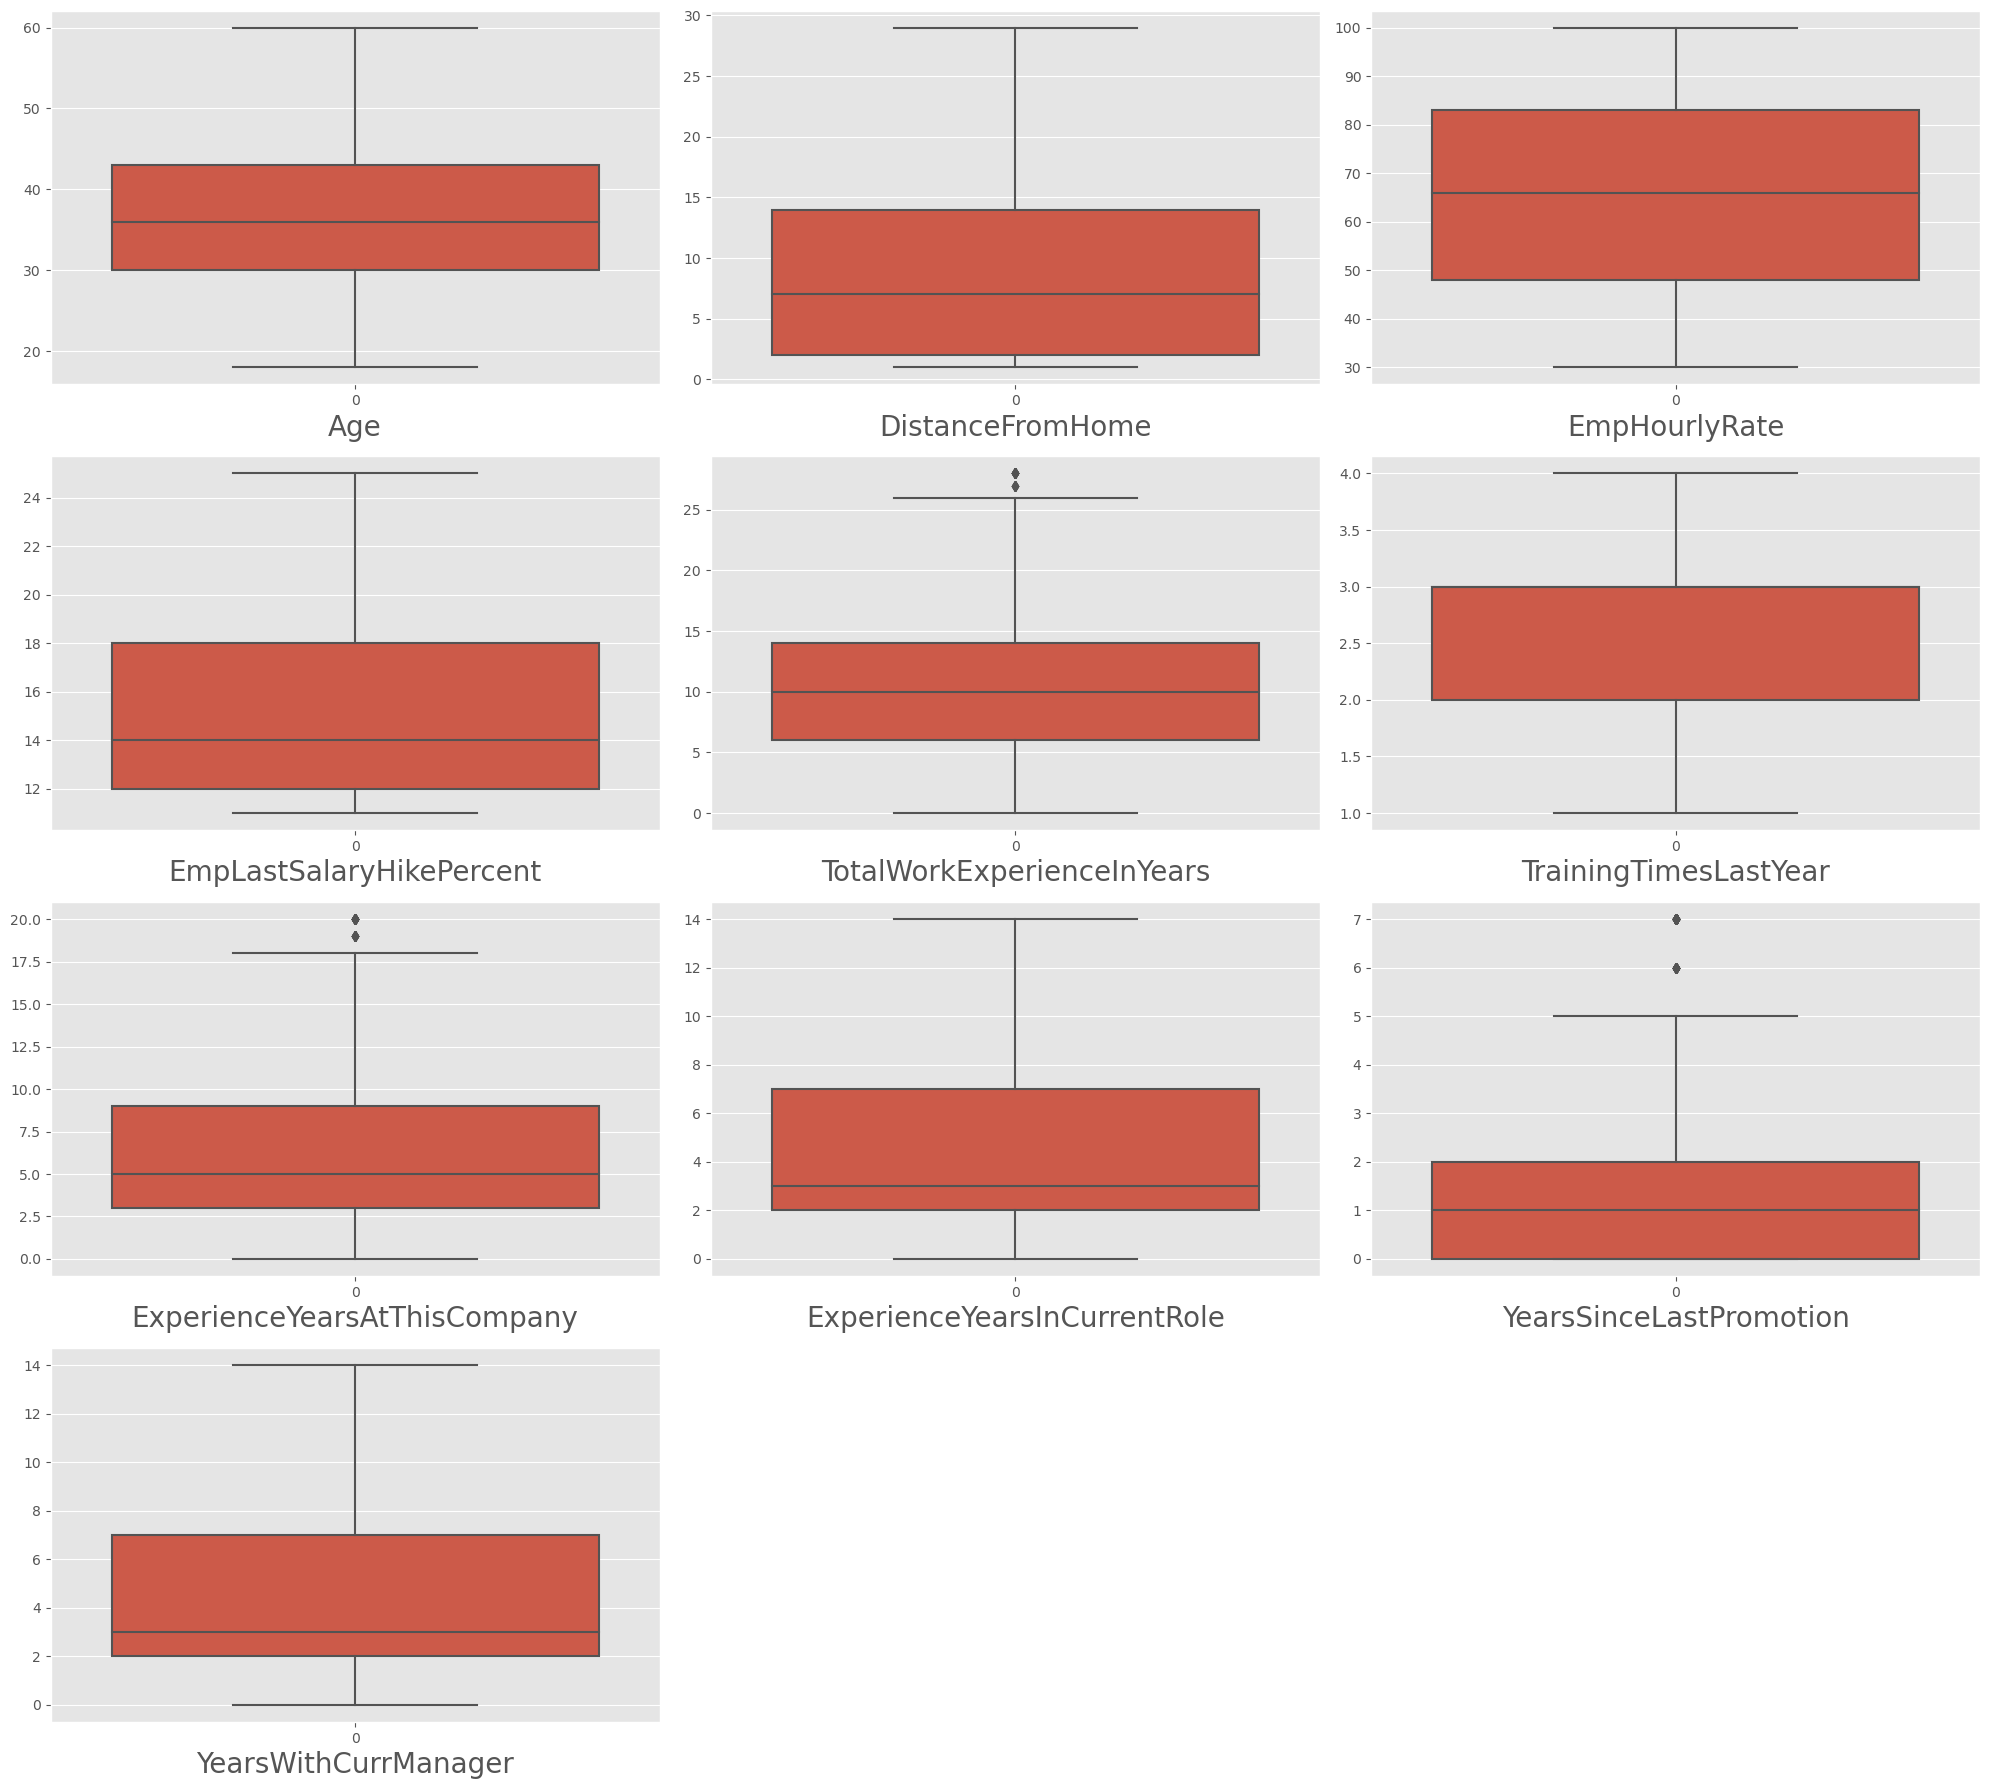

In [83]:
out = df[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
                   'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count 
    if plotno<=12:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

Observation:

Outlier impute sucessfully, but some feature box plot showing outlier, so we can not impute this outlier

# FEATURE SELECTION

In [84]:
# Dropping employee number because this is a constant column as well as drop Years Since Last Promotion because we create a new feaure using square root tr
df.drop(['YearsSinceLastPromotion'],axis=1,inplace=True)

In [85]:
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion
0,32,1,3,1,5,18,2,10,3,4,...,4,10,2,2,10,7,8,1,3,0.000000
1,47,1,3,1,5,18,2,14,4,4,...,4,20,2,3,7,7,7,1,3,1.000000
2,40,1,5,2,5,18,1,5,4,4,...,3,20,2,3,18,13,12,1,4,1.000000
3,41,1,0,0,2,11,2,10,4,2,...,2,23,2,2,5,6,6,1,3,3.464102
4,60,1,3,1,5,18,2,16,4,1,...,4,10,1,3,2,2,2,1,3,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,4,0,5,18,1,3,1,4,...,2,6,3,3,6,5,4,1,4,0.000000
1196,37,1,5,1,4,12,2,10,2,4,...,1,4,2,3,1,0,0,1,3,0.000000
1197,50,1,4,2,4,12,2,28,1,4,...,3,20,3,3,20,8,8,1,3,1.732051
1198,34,0,4,1,0,5,2,9,3,4,...,2,9,3,4,8,7,7,1,3,2.645751


## Check for multicollinearity

### Scatter matrix for numerical data

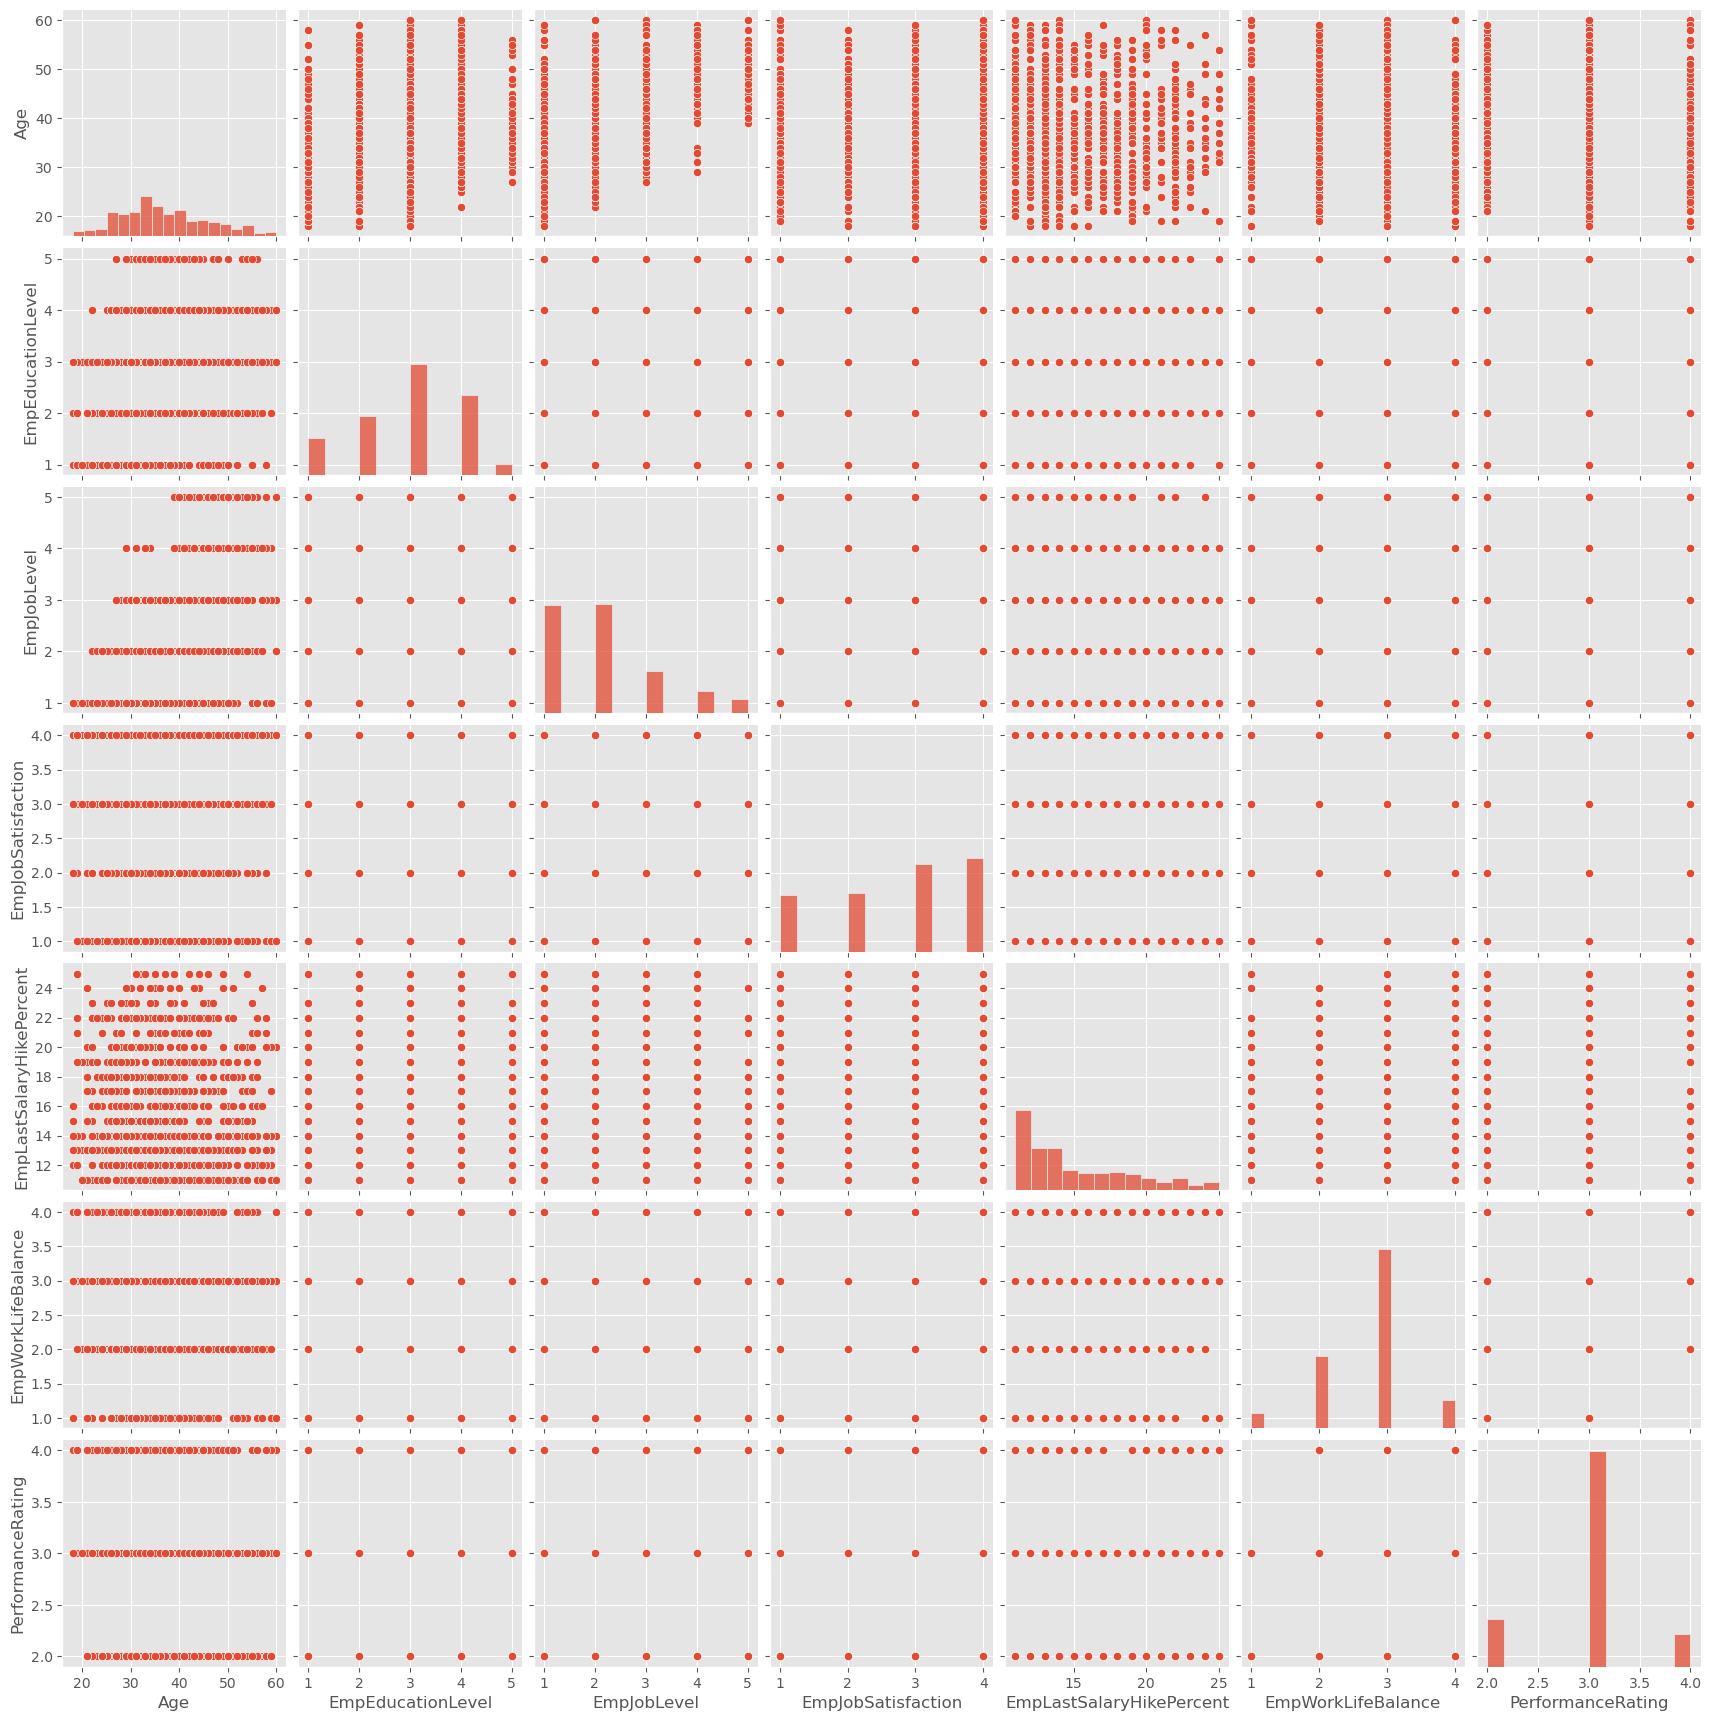

In [86]:
numerical_pairplot = df[['Age','EmpEducationLevel','EmpJobLevel','EmpJobSatisfaction','EmpLastSalaryHikePercent',
                           'EmpWorkLifeBalance','PerformanceRating']]
sns.pairplot(numerical_pairplot)


### Correlation matrix

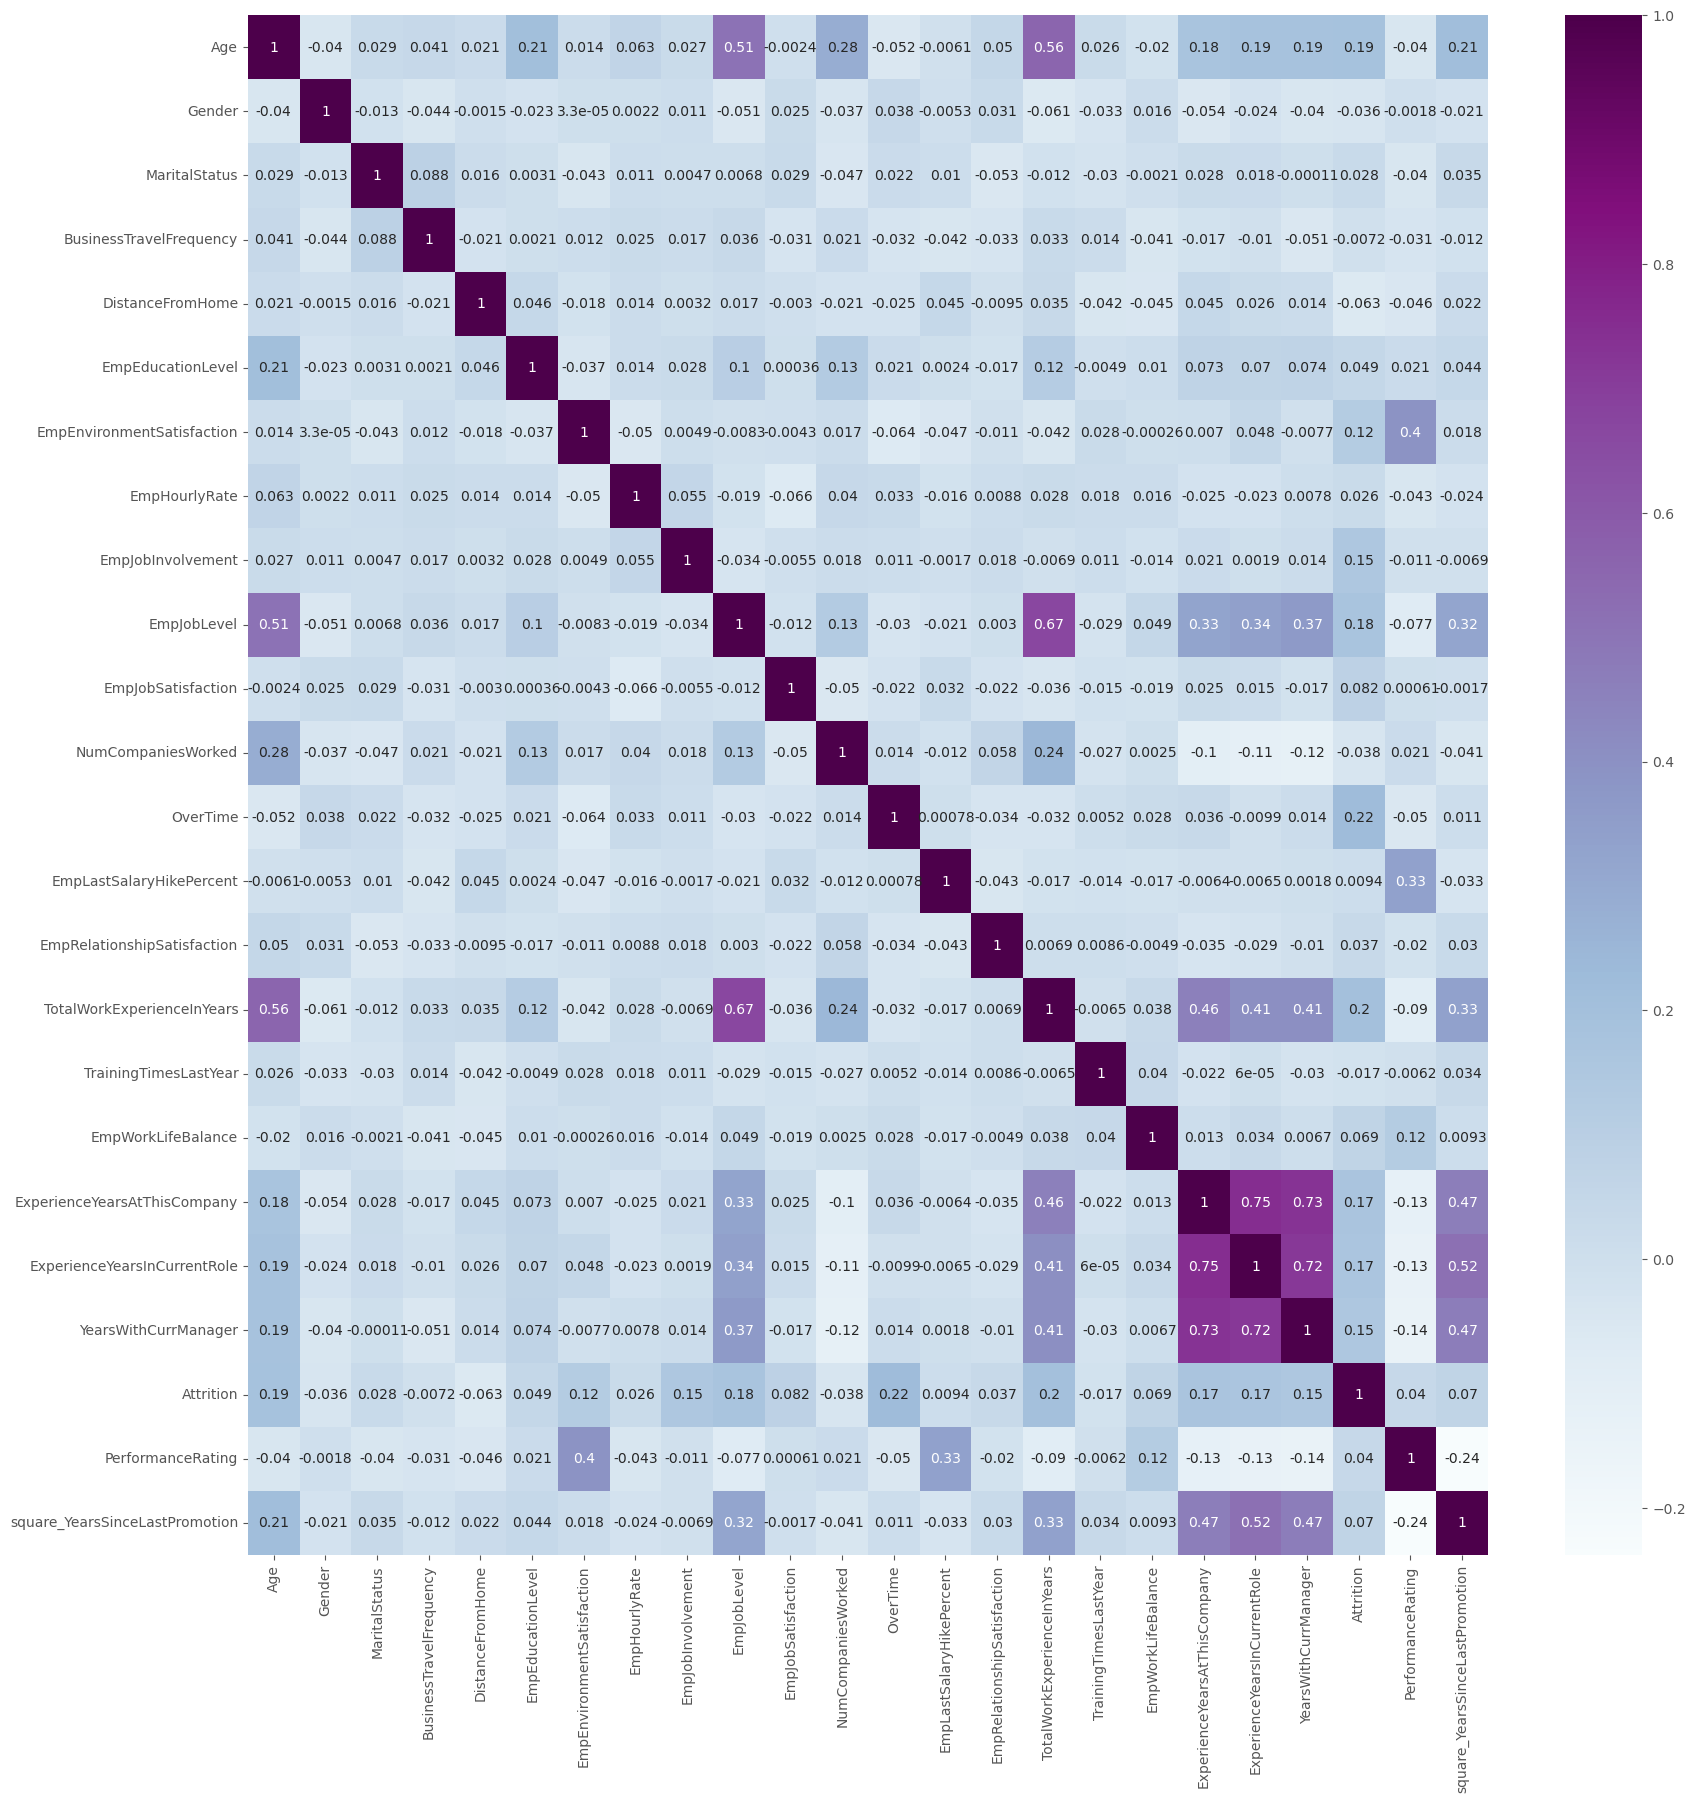

In [87]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='BuPu')
plt.show()

- From above scatter matrix and heatmap scale we are clearly seen the their is no highly correlated feature in data
- But we confirm with the help of simple code


In [88]:
df1 = df.corr(numeric_only=True).abs().stack().reset_index().sort_values(0, ascending=False)


df1['pairs'] = list(zip(df1.level_0, df1.level_1))

df1.set_index(['pairs'], inplace = True)

df1.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df1.columns = ['cc']

df1.drop_duplicates(inplace=True)

df1[(df1.cc>.75) & (df1.cc<1)]

,cc
pairs,


Now we confirm their is no highly correlated feature is present.

In [89]:
df.duplicated().sum()

0

In [90]:
#check for null values
df.isnull().sum()

Age                               0
Gender                            0
EducationBackground               0
MaritalStatus                     0
EmpDepartment                     0
EmpJobRole                        0
BusinessTravelFrequency           0
DistanceFromHome                  0
EmpEducationLevel                 0
EmpEnvironmentSatisfaction        0
EmpHourlyRate                     0
EmpJobInvolvement                 0
EmpJobLevel                       0
EmpJobSatisfaction                0
NumCompaniesWorked                0
OverTime                          0
EmpLastSalaryHikePercent          0
EmpRelationshipSatisfaction       0
TotalWorkExperienceInYears        0
TrainingTimesLastYear             0
EmpWorkLifeBalance                0
ExperienceYearsAtThisCompany      0
ExperienceYearsInCurrentRole      0
YearsWithCurrManager              0
Attrition                         0
PerformanceRating                 0
square_YearsSinceLastPromotion    0
dtype: int64

In [91]:
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion
0,32,1,3,1,5,18,2,10,3,4,...,4,10,2,2,10,7,8,1,3,0.000000
1,47,1,3,1,5,18,2,14,4,4,...,4,20,2,3,7,7,7,1,3,1.000000
2,40,1,5,2,5,18,1,5,4,4,...,3,20,2,3,18,13,12,1,4,1.000000
3,41,1,0,0,2,11,2,10,4,2,...,2,23,2,2,5,6,6,1,3,3.464102
4,60,1,3,1,5,18,2,16,4,1,...,4,10,1,3,2,2,2,1,3,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,4,0,5,18,1,3,1,4,...,2,6,3,3,6,5,4,1,4,0.000000
1196,37,1,5,1,4,12,2,10,2,4,...,1,4,2,3,1,0,0,1,3,0.000000
1197,50,1,4,2,4,12,2,28,1,4,...,3,20,3,3,20,8,8,1,3,1.732051
1198,34,0,4,1,0,5,2,9,3,4,...,2,9,3,4,8,7,7,1,3,2.645751


#### Identify categorical variables, dummy implementation

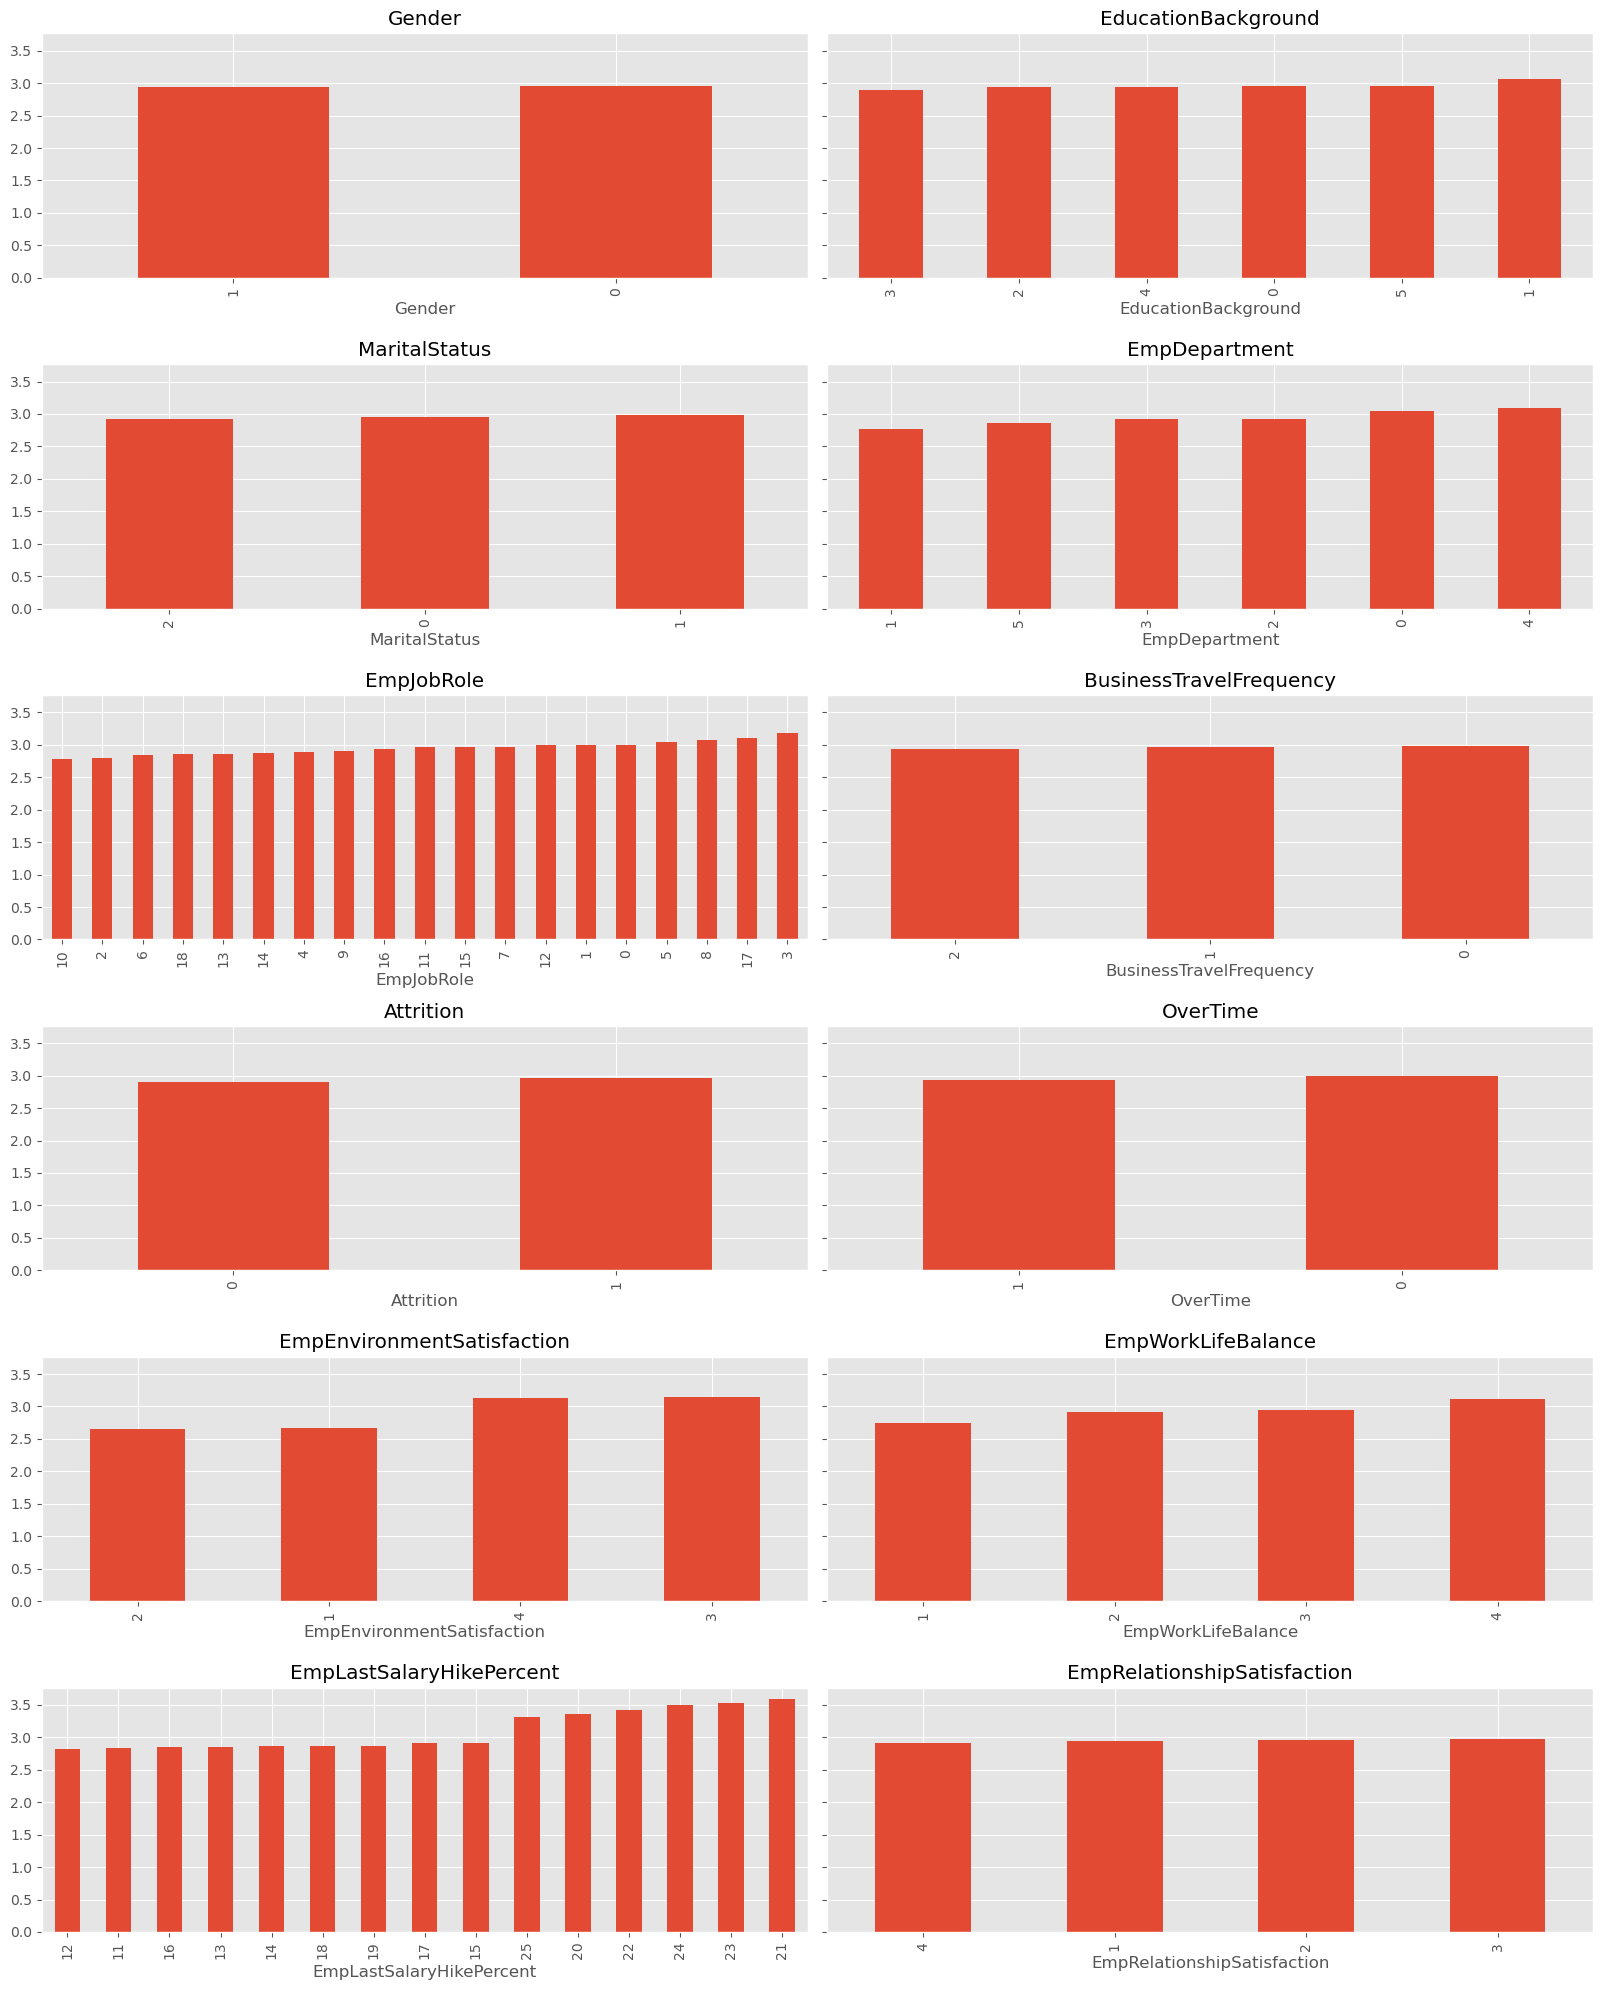

In [92]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(16,20), sharey=True)

cat = ['Gender','EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency','Attrition','OverTime','EmpEnvironmentSatisfaction', 'EmpWorkLifeBalance', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction']

for col, ax in zip(cat, axes.flatten()):
    (df.groupby(col)               # group values together by column of interest
         .mean(numeric_only=True)['PerformanceRating']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

In [93]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# creating instance of one-hot-encoder
encoder = OneHotEncoder(drop='first')

# Assume df[cat] contains the categorical columns of your original dataframe
# perform one-hot encoding on cat list
encoder_df = pd.DataFrame(encoder.fit_transform(df[cat]).toarray())

# update column names
cols = []
for x in encoder.get_feature_names_out():
    if 'x0' in x:
        cols.append(x.replace('x0', 'Gender'))
    elif 'x1' in x:
        cols.append(x.replace('x1', 'EducationBackground'))
    elif 'x2' in x:
        cols.append(x.replace('x2', 'MaritalStatus'))
    elif 'x3' in x:
        cols.append(x.replace('x3', 'EmpDepartment'))
    elif 'x4' in x:
        cols.append(x.replace('x4', 'EmpJobRole'))
    elif 'x5' in x:
        cols.append(x.replace('x5', 'BusinessTravelFrequency'))
    elif 'x6' in x:
        cols.append(x.replace('x6', 'Attrition'))
    elif 'x7' in x:
        cols.append(x.replace('x7', 'OverTime'))
    elif 'x8' in x:
        cols.append(x.replace('x8', 'EmpEnvironmentSatisfaction'))
    elif 'x9' in x:
        cols.append(x.replace('x9', 'EmpWorkLifeBalance'))
    elif 'x10' in x:
        cols.append(x.replace('x10', 'EmpLastSalaryHikePercent'))
    elif 'x11' in x:
        cols.append(x.replace('x11', 'EmpRelationshipSatisfaction'))    
    else:
        cols.append(x)

# set encoder_df columns equal cols
encoder_df.columns = cols

# merge one-hot encoded columns back with original DataFrame
df_ohe = df.join(encoder_df)

# view final df
print(df_ohe.head())

   Age  Gender EducationBackground  MaritalStatus EmpDepartment EmpJobRole  \
0   32       1                   3              1             5         18   
1   47       1                   3              1             5         18   
2   40       1                   5              2             5         18   
3   41       1                   0              0             2         11   
4   60       1                   3              1             5         18   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  ...  EmpLastSalaryHikePercent_19  \
0                           4  ...                          0

In [94]:
df_ohe.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent_19,EmpLastSalaryHikePercent_20,EmpLastSalaryHikePercent_21,EmpLastSalaryHikePercent_22,EmpLastSalaryHikePercent_23,EmpLastSalaryHikePercent_24,EmpLastSalaryHikePercent_25,EmpRelationshipSatisfaction_2,EmpRelationshipSatisfaction_3,EmpRelationshipSatisfaction_4
0,32,1,3,1,5,18,2,10,3,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,47,1,3,1,5,18,2,14,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,40,1,5,2,5,18,1,5,4,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,41,1,0,0,2,11,2,10,4,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,60,1,3,1,5,18,2,16,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [95]:
new_cols = []
for x in df_ohe:
    new_cols.append(x.replace(".", "_"))
df_ohe.columns = new_cols
df_ohe.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent_19,EmpLastSalaryHikePercent_20,EmpLastSalaryHikePercent_21,EmpLastSalaryHikePercent_22,EmpLastSalaryHikePercent_23,EmpLastSalaryHikePercent_24,EmpLastSalaryHikePercent_25,EmpRelationshipSatisfaction_2,EmpRelationshipSatisfaction_3,EmpRelationshipSatisfaction_4
0,32,1,3,1,5,18,2,10,3,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,47,1,3,1,5,18,2,14,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,40,1,5,2,5,18,1,5,4,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,41,1,0,0,2,11,2,10,4,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,60,1,3,1,5,18,2,16,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [96]:
# Drop categorical features to avoid redundancy
df_ohe.drop((cat), axis=1, inplace=True)

### MODEL

<font color='red' > The modeling phase involves selecting appropriate algorithms to analyze the data. This phase usually involves training and testing a model.  </font>

# MODEL 1 WITH NO CHANGES TO THE ORIGINAL DATA

In [97]:
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion
0,32,1,3,1,5,18,2,10,3,4,...,4,10,2,2,10,7,8,1,3,0.000000
1,47,1,3,1,5,18,2,14,4,4,...,4,20,2,3,7,7,7,1,3,1.000000
2,40,1,5,2,5,18,1,5,4,4,...,3,20,2,3,18,13,12,1,4,1.000000
3,41,1,0,0,2,11,2,10,4,2,...,2,23,2,2,5,6,6,1,3,3.464102
4,60,1,3,1,5,18,2,16,4,1,...,4,10,1,3,2,2,2,1,3,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,4,0,5,18,1,3,1,4,...,2,6,3,3,6,5,4,1,4,0.000000
1196,37,1,5,1,4,12,2,10,2,4,...,1,4,2,3,1,0,0,1,3,0.000000
1197,50,1,4,2,4,12,2,28,1,4,...,3,20,3,3,20,8,8,1,3,1.732051
1198,34,0,4,1,0,5,2,9,3,4,...,2,9,3,4,8,7,7,1,3,2.645751


In [98]:
train, test = train_test_split(df, random_state = 150)
train.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion
152,45,1,5,2,4,17,0,23,2,4,...,3,9,2,3,9,8,8,1,3,0.000000
1127,30,1,3,1,5,14,2,7,1,4,...,1,4,3,3,3,2,2,1,3,1.000000
1054,42,0,5,1,4,17,2,23,5,1,...,2,16,2,3,1,0,0,1,3,0.000000
899,41,1,5,0,4,17,2,14,3,1,...,1,13,2,3,9,8,8,1,3,1.000000
250,29,0,5,2,5,18,2,23,1,4,...,1,11,3,1,11,8,10,0,2,1.732051


In [99]:
# Create model function to fit a linear regression that includes rmse
def model1(train, test):
  
  target = 'PerformanceRating'
  x_cols = list(train.columns)
  x_cols.remove('PerformanceRating')

  predictors = '+'.join(x_cols)
  formula = target + '~' + predictors
  model = ols(formula=formula, data=train).fit()

  # RMSE
  train_err = (mean_squared_error(train['PerformanceRating'], model.predict(train)))**0.5
  test_err = (mean_squared_error(test['PerformanceRating'], model.predict(test)))**0.5

  print("Train RMSE: ", train_err)
  print("Test RMSE: ", test_err, '\n')

  return model

In [100]:
model1(train, test).summary()

Train RMSE:  0.39743752485508266
Test RMSE:  0.41582158445682244 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      PerformanceRating   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     12.93
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           3.13e-72
Time:                        21:48:07   Log-Likelihood:                -446.60
No. Observations:                 900   AIC:                             991.2
Df Residuals:                     851   BIC:                             1227.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          1.4537      0.180      8.091      0.000       1.101       1.806
EducationBackground[T.1]          -0.1465      0.154     -0.949      0.343      -0.449       0.156
EducationBackground[T.2]          -0.0601      0.150     -0.400      0.689      -0.355       0.235
EducationBackground[T.3]          -0.0505      0.153     -0.330      0.742      -0.351       0.250
EducationBackground[T.4]          -0.0771      0.145     -0.531      0.596      -0.362       0.208
EducationBackground[T.5]          -0.0897      0.145     -0.617      0.537      -0.375       0.196
EmpDepartment[T.1]                 0.0747      0.043      1.730      0.084      -0.010       0.159
EmpDepartment[T.2]                 0.2639      0.173      1.522      0.128      -0.076       0.604
EmpDepartment[T.3]                 0.2773      0.111      2.490      0.013       0.059       0.496
EmpDepartment[T.4]                 0.2803      0.150      1.864      0.063      -0.015       0.575
EmpDepartment[T.5]                 0.1449      0.121      1.196      0.232      -0.093       0.383
EmpJobRole[T.1]                    0.0289      0.224      0.129      0.897      -0.410       0.468
EmpJobRole[T.2]                   -0.0043      0.125     -0.035      0.972      -0.249       0.240
EmpJobRole[T.3]                    0.2549      0.205      1.245      0.214      -0.147       0.657
EmpJobRole[T.4]                    0.1126      0.125      0.897      0.370      -0.134       0.359
EmpJobRole[T.5]                    0.4127      0.106      3.878      0.000       0.204       0.622
EmpJobRole[T.6]                    0.0414      0.108      0.383      0.702      -0.171       0.253
EmpJobRole[T.7]                    0.0680      0.109      0.622      0.534      -0.147       0.283
EmpJobRole[T.8]                    0.1533      0.189      0.809      0.419      -0.219       0.525
EmpJobRole[T.9]                    0.0255      0.206      0.124      0.901      -0.379       0.430
EmpJobRole[T.10]                   0.0747      0.043      1.730      0.084      -0.010       0.159
EmpJobRole[T.11]                   0.1968      0.113      1.748      0.081      -0.024       0.418
EmpJobRole[T.12]                   0.0896      0.182      0.493      0.622      -0.267       0.446
EmpJobRole[T.13]                  -0.0052      0.097     -0.053      0.958      -0.196       0.185
EmpJobRole[T.14]                   0.0151      0.139      0.109      0.913      -0.257       0.287
EmpJobRole[T.15]                   0.0180      0.092      0.195      0.845      -0.163       0.199
EmpJobRole[T.16]                   0.0584      0.090      0.651      0.515      -0.118       0.235
EmpJobRole[T.17]                   0.2459      0.172      1.429      0.153      -0.092       0.584
EmpJobRole[T.1

# MODEL 2 WITH DUMMY VARIABLES

In [101]:
df_ohe

,Age,DistanceFromHome,EmpEducationLevel,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,TotalWorkExperienceInYears,TrainingTimesLastYear,...,EmpLastSalaryHikePercent_19,EmpLastSalaryHikePercent_20,EmpLastSalaryHikePercent_21,EmpLastSalaryHikePercent_22,EmpLastSalaryHikePercent_23,EmpLastSalaryHikePercent_24,EmpLastSalaryHikePercent_25,EmpRelationshipSatisfaction_2,EmpRelationshipSatisfaction_3,EmpRelationshipSatisfaction_4
0,32,10,3,55,3,2,4,1,10,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,47,14,4,42,3,2,1,2,20,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,40,5,4,48,2,3,1,5,20,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,41,10,4,73,2,5,4,3,23,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,60,16,4,84,3,2,1,8,10,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,1,71,4,2,4,1,6,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1196,37,10,2,80,4,1,4,3,4,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1197,50,28,1,74,4,1,3,1,20,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1198,34,9,3,46,2,3,2,1,9,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [102]:
train, test = train_test_split(df_ohe, random_state = 150)
train.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,TotalWorkExperienceInYears,TrainingTimesLastYear,...,EmpLastSalaryHikePercent_19,EmpLastSalaryHikePercent_20,EmpLastSalaryHikePercent_21,EmpLastSalaryHikePercent_22,EmpLastSalaryHikePercent_23,EmpLastSalaryHikePercent_24,EmpLastSalaryHikePercent_25,EmpRelationshipSatisfaction_2,EmpRelationshipSatisfaction_3,EmpRelationshipSatisfaction_4
152,45,23,2,42,3,2,1,1,9,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1127,30,7,1,57,3,1,2,0,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1054,42,23,5,44,3,4,4,2,16,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
899,41,14,3,56,3,1,3,4,13,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250,29,23,1,45,2,3,1,1,11,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
# Create model function to fit a linear regression that includes rmse
def model1(train, test):
  
  target = 'PerformanceRating'
  x_cols = list(train.columns)
  x_cols.remove('PerformanceRating')

  predictors = '+'.join(x_cols)
  formula = target + '~' + predictors
  model = ols(formula=formula, data=train).fit()

  # RMSE
  train_err = (mean_squared_error(train['PerformanceRating'], model.predict(train)))**0.5
  test_err = (mean_squared_error(test['PerformanceRating'], model.predict(test)))**0.5

  print("Train RMSE: ", train_err)
  print("Test RMSE: ", test_err, '\n')

  return model

In [104]:
model1(train, test).summary()

Train RMSE:  0.3575062837458261
Test RMSE:  0.3836557985067259 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      PerformanceRating   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     13.68
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           3.40e-96
Time:                        21:48:07   Log-Likelihood:                -351.30
No. Observations:                 900   AIC:                             842.6
Df Residuals:                     830   BIC:                             1179.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          2.0227      0.160     12.629      0.000       1.708       2.337
Age                               -0.0014      0.002     -0.793      0.428      -0.005       0.002
DistanceFromHome                  -0.0031      0.002     -1.940      0.053      -0.006    3.59e-05
EmpEducationLevel                  0.0191      0.013      1.522      0.129      -0.006       0.044
EmpHourlyRate                     -0.0015      0.001     -2.472      0.014      -0.003      -0.000
EmpJobInvolvement                  0.0059      0.019      0.316      0.752      -0.031       0.042
EmpJobLevel                       -0.0002      0.019     -0.008      0.993      -0.037       0.037
EmpJobSatisfaction                -0.0029      0.012     -0.247      0.805      -0.026       0.020
NumCompaniesWorked                -0.0003      0.006     -0.056      0.956      -0.012       0.011
TotalWorkExperienceInYears         0.0010      0.003      0.308      0.758      -0.005       0.007
TrainingTimesLastYear             -0.0089      0.018     -0.482      0.630      -0.045       0.027
ExperienceYearsAtThisCompany       0.0026      0.005      0.546      0.585      -0.007       0.012
ExperienceYearsInCurrentRole      -0.0069      0.006     -1.081      0.280      -0.019       0.006
YearsWithCurrManager              -0.0070      0.006     -1.121      0.263      -0.019       0.005
square_YearsSinceLastPromotion    -0.1166      0.015     -7.735      0.000      -0.146      -0.087
Gender_1                           0.0028      0.027      0.107      0.915      -0.049       0.055
EducationBackground_1             -0.1364      0.142     -0.961      0.337      -0.415       0.142
EducationBackground_2             -0.1001      0.138     -0.726      0.468      -0.371       0.171
EducationBackground_3             -0.0485      0.140     -0.345      0.730      -0.324       0.227
EducationBackground_4             -0.0781      0.133     -0.586      0.558      -0.340       0.184
EducationBackground_5             -0.0890      0.134     -0.666      0.505      -0.351       0.173
MaritalStatus_1                    0.0577      0.036      1.598      0.110      -0.013       0.128
MaritalStatus_2                    0.0443      0.034      1.319      0.188      -0.022       0.110
EmpDepartment_1                    0.1674      0.039      4.249      0.000       0.090       0.245
EmpDepartment_2                    0.2605      0.161      1.622      0.105      -0.055       0.576
EmpDepartment_3                    0.4132      0.102      4.036      0.000       0.212       0.614
EmpDepartment_4                    0.4032      0.139      2.908      0.004       0.131       0.675
EmpDepartment_5                    0.2324      0.112      2.074      0.038       0.012       0.452
EmpJobRole_1  

# MODEL 3 - LOGISTIC REGRESSION FOR CATEGORICAL DATATYPE

### LOGISTIC VS LINEAR REGRESSION 

Both logistic and linear regression are statistical methods used for predicting an outcome based on one or more predictors. However, they are used for different types of problems and have different assumptions and interpretations. Here are the primary differences between the two:

**Type of Dependent Variable:**

- Linear Regression: The dependent variable is continuous. For example, predicting house prices, temperature, sales amounts, etc.
- Logistic Regression: The dependent variable is categorical. Most commonly, it is binary (e.g., 0 or 1, Yes or No, True or False). However, there are extensions for multinomial outcomes too.

**Output:**

- Linear Regression: Predicts a value that is unbounded, meaning the prediction can range from negative to positive infinity.
- Logistic Regression: Predicts the probability of the dependent event occurring, which lies between 0 and 1.

**Assumption About Error Distribution:**

- Linear Regression: Assumes that the residuals (errors) are normally distributed.
- Logistic Regression: Does not assume a normal distribution of residuals. Instead, it assumes a binomial distribution of the dependent variable.

**Assumption About Linearity:**

- Linear Regression: Assumes a linear relationship between the dependent and independent variables.
- Logistic Regression: Assumes a linear relationship between the logit of the outcome and the predictors.

**Loss Function:**

- Linear Regression: Typically uses mean squared error.
- Logistic Regression: Uses binary cross-entropy (for binary classification) or categorical cross-entropy (for multi-class classification).

**Use Cases:**

- Linear Regression: When you want to predict a continuous outcome variable based on one or more predictor variables. E.g., Predicting house prices based on square footage, number of rooms, location, etc.
- Logistic Regression: When you want to predict the probability of an event occurring. E.g., employee performance analysis where employee like the job yes = 1 and no= 0)

## Now, separating target and dependent variables

In [105]:
# Spliting the independent and dependent features
x = df.drop('PerformanceRating',axis=1)
y= df.PerformanceRating 

In [106]:
df.PerformanceRating.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

In [107]:
# It has imbalance in data that is high number no Attrition whereas very less number of Attrition, so using SMOTE method from over_sampling technique  to balance data so model never biase while generalization.
from collections import Counter
from imblearn.over_sampling import SMOTE
imbalance = SMOTE()
print(Counter(y))
x_sm, y_sm = imbalance.fit_resample(x,y)
print(Counter(y_sm))

Counter({3: 874, 2: 194, 4: 132})
Counter({3: 874, 4: 874, 2: 874})


In [108]:
x_sm.shape

(2622, 26)

## Scaling

In [109]:
# using StandardScaler for scaling the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_sm[:]= scale.fit_transform(x_sm[:])
x_sm

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsWithCurrManager,Attrition,square_YearsSinceLastPromotion
0,-0.526005,1.031779,-0.825993,-0.125448,1.149889,0.994921,0.778322,0.196870,0.320971,1.497838,...,-1.104981,1.511701,-0.040608,-0.675442,-0.965219,0.925649,0.926866,1.251718,0.547089,-1.198301
1,1.187835,1.031779,-0.825993,-0.125448,1.149889,0.994921,0.778322,0.711906,1.339839,1.497838,...,-1.104981,1.511701,1.602519,-0.675442,0.501914,0.216676,0.926866,0.937349,0.547089,-0.177365
2,0.388043,1.031779,0.961483,1.200859,1.149889,0.994921,-0.634947,-0.446924,1.339839,1.497838,...,1.164611,0.524237,1.602519,-0.675442,0.501914,2.816243,2.855119,2.509190,0.547089,-0.177365
3,0.502299,1.031779,-3.507207,-1.451755,-1.635914,-0.719738,0.778322,0.196870,1.339839,-0.351188,...,-0.348450,-0.463227,2.095458,-0.675442,-0.965219,-0.255973,0.605490,0.622981,0.547089,2.338325
4,2.673163,1.031779,-0.825993,-0.125448,1.149889,0.994921,0.778322,0.969424,1.339839,-1.275701,...,-0.600627,1.511701,-0.040608,-2.185253,0.501914,-0.964946,-0.680012,-0.634491,0.547089,0.245521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,-0.526005,-0.969200,0.542252,-1.451755,-0.707313,-0.873790,-2.048215,-0.060647,-0.697897,0.573325,...,0.912434,0.524237,-0.040608,-0.675442,0.501914,0.689324,0.926866,1.251718,0.547089,0.526052
2618,-0.411749,-0.969200,-0.927198,-0.125448,0.221288,0.749970,0.778322,-0.189406,0.320971,0.573325,...,1.164611,-0.463227,0.616643,-0.675442,0.501914,0.689324,0.284115,0.622981,0.547089,-0.177365
2619,0.502299,1.031779,0.368827,-0.125448,1.149889,0.994921,-0.634947,-0.575683,1.339839,-0.351188,...,-0.852804,-0.463227,-0.369234,0.834369,0.501914,-0.255973,-0.358636,-0.948859,-1.827857,-1.198301
2620,-1.325797,1.031779,0.067745,-1.451755,-0.707313,0.470475,0.778322,1.613218,0.320971,-1.275701,...,0.912434,0.524237,-1.519423,-0.675442,-0.965219,-1.201270,-1.001387,-1.263228,-1.827857,-1.150308


# Creating Training and Validation set using cross validation

In [110]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer, classification_report
kf = KFold(n_splits= 10)

For given dataset, it is based on classification problem so applying various classfication models to get better results best on predictions using various parameters.

In [111]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [112]:
# function for getting score by passing each models.
def get_score(model,x_train,x_test,y_train,y_test):    
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    score = accuracy_score(y_test,y_predict)
    return score

In [113]:
#using cross validation splitting function and applying each models and passing to the get_score() function for capturing each splitted score
Logistic_score_cv = []

for train,test in kf.split(x_sm,y_sm):
    X_train, X_test, y_train,y_test = x_sm.iloc[train],x_sm.iloc[test],y_sm.iloc[train],y_sm.iloc[test]
    Logistic_score_cv.append(get_score(LR,X_train,X_test,y_train,y_test))


In [114]:
# just used for clearing list of scores stored of the model
Logistic_score_cv.clear()

In [115]:
#Displaying the score of LogisticRegression model of each split
Logistic_score_cv

[]

# LogisticRegression

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.30,random_state=42)

# using GridSrearchCV hyperparametres for logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

LR_model1 = LogisticRegression()
#new parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid_dict1 = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search1 = GridSearchCV(estimator=LR_model1, param_grid=grid_dict1, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_result1 = grid_search1.fit(x_train, y_train)
# summarize results
print("Best_score: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))

Best_score: 0.844678 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [117]:
LR = LogisticRegression(C=0.1,penalty='l2',solver='newton-cg')
LR.fit(x_sm,y_sm)
y_predict_lr = LR.predict(x_test)
accuracy_score(y_test,y_predict_lr)

0.8526048284625158

In [118]:
# Using RandomizedSearchCV hyperparametres for logistic regression


LR_model2 = LogisticRegression()
#new parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid_dict2 = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search2 = RandomizedSearchCV(estimator=LogisticRegression(), param_distributions=grid_dict2, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_result2 = grid_search2.fit(x_sm, y_sm)
# summarize results
print("Best_score: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

Best_score: 0.840673 using {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}


In [119]:
LR2 = LogisticRegression(C=0.1,penalty='l2',solver='newton-cg')
LR2.fit(x_sm,y_sm)
y_predict_lr2 = LR.predict(x_test)
accuracy_score(y_test,y_predict_lr)

0.8526048284625158

In [120]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix----",confusion_matrix(y_test,y_predict_lr2))
print("Classification Report----",classification_report(y_test,y_predict_lr2))

Confusion Matrix---- [[246  15  17]
 [ 29 191  30]
 [  4  21 234]]
Classification Report----               precision    recall  f1-score   support

           2       0.88      0.88      0.88       278
           3       0.84      0.76      0.80       250
           4       0.83      0.90      0.87       259

    accuracy                           0.85       787
   macro avg       0.85      0.85      0.85       787
weighted avg       0.85      0.85      0.85       787



If you have a logistic regression output of 0.85, it typically means that the probability of the event (or the "1" outcome) occurring is 0.85 or 85%, assuming you're referring to the predicted probability.

Here's a breakdown:

**Logistic Regression Output:** In the context of a binary logistic regression, the output is a probability that the given input point belongs to a certain class (usually denoted as class "1"). This probability is bounded between 0 and 1.

**Interpretation:** If the logistic regression model outputs 0.84 for a particular input, it means that, according to the model and based on the features of that input, there is an 85% chance that the input belongs to class "1" and a 16% chance that it belongs to the other class (often denoted as class "0").

**Decision Threshold:** Often, a threshold of 0.5 is used to make a classification decision. If the output probability is 0.5 or greater, the prediction is class "1", and if it's less than 0.5, the prediction is class "0". Given the value of 0.85, with a threshold of 0.5, the prediction would be class "1".

However, it's important to note:

A prediction of 0.85 doesn't necessarily guarantee that the outcome will be class "1". It just means that, based on the model, the likelihood is 85%.

________________________________________________________

### INTERPRET 

<font color='red' > The final step is interpreting the results</font>

#### Objective:
The main goal of this analysis is to discern actionable insights from the Employee dataset concerning the factors affecting performance ratings. With a data-driven approach, the aim is to predict these ratings precisely and identify the most influential factors. These insights are fundamental to informed HR decision-making, which will subsequently enhance employee performance and fuel organizational growth.

**Performance Ratings Overview:**
- Excellent: Across all departments, there's a noteworthy 60-80% excellence in employee performance.

**Departmental Performance Insights:**
- Sales: Primarily scoring a performance rating of 3. Men slightly outperform women.
- Human Resources: Predominantly, HR professionals have a performance rating of 3. Older employees lag slightly in their ratings, but women in HR are excelling.
- Development: Most employees achieve a performance rating of 3. Age doesn't show a significant difference in ratings. Both genders perform equally well.
- Data Science: This department showcases the highest average of level 3 performers. There's a smaller proportion of level 2 performers. Men in this sector are slightly leading.
- Research & Development: Age is not a significant factor in performance levels. Women in this department are particularly outstanding.
- Finance: An interesting pattern emerges where, as employees age, their performance dips. Men lead in performance ratings. Experienced employees seem to face challenges as their performance slightly decreases.

**Top 3 Factors Affecting Employee Performance:**

- Employee Environment Satisfaction:

Low (19%): Often leads to decreased morale, lower productivity, and potential higher turnover.
Medium (20.2%): Indicates an average working environment, signifying room for improvement.
High (30.6%): Directly related to better morale, increased productivity, and lower turnover.
Very High (30.1%): Suggests a highly positive working environment, leading to high employee loyalty and a strong organizational culture.

- Employee Last Salary Hike Percentage:

11-19%: Majority of employees in this range have performance ratings of Good and Excellent.
20-22%: Employees predominantly have an Outstanding performance rating.

- Employee Work Life Balance:

The heatmap analysis shows that employees with a 'Better' work-life balance tend to have excellent performance ratings. This reinforces the importance of maintaining a healthy work-life balance to ensure high levels of employee performance.

**Regression Analysis Insights:**

Linear regression resulted in an R-square value of 0.53, while logistic regression yielded a more promising 0.85. Given the nature of the dataset and the categorization of employee performance ratings, logistic regression proves to be a more suitable model.

**Importance of Logistic Regression for This Dataset:**
Linear regression, which is predominantly used for continuous dependent variables, did not reveal a strong correlation between the variables in this dataset. However, the higher logistic regression score of 0.85 indicates its efficacy in predicting categorical outcomes like employee performance ratings.

In summary, for datasets where the dependent variable is categorical, like our performance ratings, logistic regression offers a more relevant and effective analytical approach compared to linear regression. 

# Message for the HR and Companies 

### Focus on Employee Environment Satisfaction:

Workspace Enhancement: If the physical workspace is a concern, consider redesigning or renovating to foster a conducive working environment. This includes ergonomic furniture, adequate lighting, and noise control.

Organizational Culture: Strengthen an inclusive, collaborative, and transparent work culture. Regular feedback loops, team-building exercises, and open-door policies can foster this.

### Review Compensation Regularly:

Salary Assessment: With 'Last Salary Hike' emerging as a significant determinant, it's crucial to ensure that salary hikes are competitive, fair, and in line with industry standards. Regular market benchmarks can be beneficial.

Performance-based Incentives: Introduce or enhance performance-based bonuses or incentives to motivate employees further.

### Promote Work-Life Balance:

Flexible Working Hours: Allowing employees to choose their work hours or providing flexitime can help them balance personal and professional commitments.

Remote Work Options: If feasible, offer options for partial or full remote work. This can also help in reducing commute stress.
Mental Health Initiatives: Workshops on stress management, counseling services, and regular breaks can help ensure mental well-being.

### Continuous Learning & Development:

Training Programs: Invest in training programs that address the specific needs of the departments highlighted in the analysis.

Skill Enhancement: Encourage employees to upskill or reskill by offering sponsorship for courses or certifications that align with the company's goals.

### Feedback Mechanism:

Regular Check-ins: Instead of annual reviews, consider more frequent check-ins to provide real-time feedback and address concerns.

Feedback Platforms: Implement platforms where employees can voice their concerns, offer suggestions, and feel heard.

### Data-Driven Decision Making:

Refine Analytical Models: Since logistic regression was identified as apt for this dataset, use it for future performance analyses but remain open to re-evaluating and adopting other models as the data evolves.

Expand Data Analysis: Continuously collect and analyze data on other potential determinants of performance ratings to get a holistic understanding.

### Promote Collaboration:

Cross-Functional Projects: Encourage projects that require collaboration across departments (Sales, HR, Data Science, etc.). This can promote knowledge sharing and foster a unified company vision.

### Recognition and Reward System:

Employee of the Month: Recognize and reward outstanding performers. This can serve as a motivation for others.

Spot Awards: Immediate rewards for achievements or innovative ideas can boost morale.

### Career Path Clarity:

Clear Progression: Ensure that employees understand their career paths within the organization. This clarity can serve as motivation to perform better.


By implementing these strategies and continuously evaluating their impact, companies can effectively enhance employee performance ratings over time.





